1. https://jalcocert.github.io/JAlcocerT/dji-oa5pro-firmware-updates/#extracting-telemetry-data-from-gph9
2. https://jalcocert.github.io/JAlcocerT/geospatial-data
3. https://jalcocert.github.io/JAlcocerT/tinkering-telemetry-trackdays
4. https://jalcocert.github.io/JAlcocerT/blog/tinker-racing/#onboard-telemetry

Modified Dec25: -1a/b/c.txt are yosuas and -2a/b/c.txt are mini

```sh
sudo apt-get install libimage-exiftool-perl

exiftool -ee ./Z_GoPro/GX020410.MP4 > ./Z_GoPro/Gopro-Kart.txt

###alternatively...
#/usr/bin/exiftool -ee -G1 -json /home/jalcocert/Desktop/Karting/GX030390.MP4 > output.json
#/usr/bin/exiftool -a -ee -G1 -json /home/jalcocert/Desktop/Karting/GX030390.MP4 > output_all.json
```

In [ ]:
#choco install python -y
#choco install exiftool -y

In [3]:
#Setup a Venv and try this:

import sys
print(sys.version)

3.10.12 (main, Nov  4 2025, 08:48:33) [GCC 11.4.0]


In [4]:
def extract_gps_speeds(file_path):
    gps_speeds = []  # List to store GPS Speed values
    try:
        with open(file_path, 'r') as file:
            for line in file:
                # Check if the line contains "GPS Speed"
                if "GPS Speed" in line:
                    # Split the line to extract the speed value
                    parts = line.strip().split(':')
                    if len(parts) == 2:
                        try:
                            # Convert the value to a float and store it
                            speed = float(parts[1].strip())
                            gps_speeds.append(speed)
                        except ValueError:
                            print(f"Could not parse GPS Speed from line: {line.strip()}")
        
        # Print all extracted GPS Speed values
        print("Extracted GPS Speeds:")
        for speed in gps_speeds:
            print(speed)
        
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")

# Specify the path to the file
#file_path = "./Data_GoPro/output-GX030390.txt"
#extract_gps_speeds(file_path)


In [5]:
#pip install matplotlib
import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")

Matplotlib version: 3.10.6


In [ ]:
#pip install plotly

In [6]:
import pandas as pd
print(pd.__version__)


2.3.2


In [8]:
filename = "gopro-kart.txt"

In [9]:
import re
import plotly.express as px
import plotly.graph_objects as go
import plotly

# Function to extract GPS Speed information from the file
def extract_gps_speeds(filename):
    with open(filename, 'r') as file:
        content = file.read()

    # Regular expression to find GPS Speed
    speed_pattern = r"GPS Speed\s+:\s+([\d.]+)"
    speeds = [float(match) for match in re.findall(speed_pattern, content)]
    return speeds

# Plot a boxplot of the speed distribution using Plotly
def plot_speed_distribution(speeds):
    fig = go.Figure()

    # Add box plot to the figure
    fig.add_trace(go.Box(
        x=speeds,
        name="GPS Speeds",
        boxpoints="all",  # Show all points
        jitter=0.3,  # Spread out the points
        pointpos=-1.8,  # Position the points
        marker=dict(color="lightblue"),
        line=dict(color="darkblue")
    ))

    # Update layout
    fig.update_layout(
        title="GPS Speed Distribution",
        xaxis_title="Speed (m/s)",
        yaxis_title="",
        xaxis=dict(showgrid=True),
        yaxis=dict(showticklabels=False),
        template="plotly_white"
    )

    fig.show()

# Main execution
if __name__ == "__main__":
    # Display the Plotly version
    print(f"Plotly version: {plotly.__version__}")

    #filename = "gopro-kart.txt"
    gps_speeds = extract_gps_speeds(filename)
    print(f"Extracted {len(gps_speeds)} GPS speeds.")
    plot_speed_distribution(gps_speeds)


Plotly version: 5.18.0
Extracted 9681 GPS speeds.


In [10]:
def extract_gps_speeds(filename):
    with open(filename, 'r', encoding='utf-16-le') as file:  # Changed encoding to 'utf-16-le'
        content = file.read()

    # Regular expression to find GPS Speed
    speed_pattern = r"GPS Speed\s+:\s+([\d.]+)"
    speeds = re.findall(speed_pattern, content)
    
    # Convert string speeds to float
    return [float(speed) for speed in speeds]

In [11]:
import re  # Add this import at the top of your code

def extract_gps_speeds(filename):
    with open(filename, 'r', encoding='utf-16-le') as file:
        content = file.read()

    # Regular expression to find GPS Speed
    speed_pattern = r"GPS Speed\s+:\s+([\d.]+)"
    speeds = re.findall(speed_pattern, content)
    
    # Convert string speeds to float
    return [float(speed) for speed in speeds]

# The rest of your code remains the same
def calculate_speed_statistics(gps_speeds):
    """
    Calculates and prints speed statistics (max, average, median) in km/h.
    Assumes input speeds are already in kilometers per hour (km/h).

    Args:
        gps_speeds: A list or NumPy array of speed values in km/h.
    """
    speeds_array = np.array(gps_speeds)

    # Calculate statistics in km/h
    max_speed = speeds_array.max()
    avg_speed = speeds_array.mean()
    median_speed = np.median(speeds_array)

    # Print results
    print(f"Max Speed: {max_speed:.2f} km/h")
    print(f"Average Speed: {avg_speed:.2f} km/h")
    print(f"Median Speed: {median_speed:.2f} km/h")

# Example usage:
if __name__ == "__main__":
    #filename = "output-kart25dec-2b.txt"
    gps_speeds = extract_gps_speeds(filename)
    calculate_speed_statistics(gps_speeds)

UnicodeDecodeError: 'utf-16-le' codec can't decode byte 0x0a in position 3297964: truncated data

In [12]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def plot_speeds(gps_speeds, start_time=None, time_interval=1):
    """
    Plots GPS speeds over time or index.
    
    Args:
        gps_speeds: List of speed values in km/h
        start_time: (Optional) datetime object for the first data point.
                   If None, uses index numbers on x-axis.
        time_interval: Time interval in seconds between measurements (default: 1s)
    """
    plt.figure(figsize=(12, 6))
    
    if start_time:
        # Create time points
        times = [start_time + timedelta(seconds=i*time_interval) 
                for i in range(len(gps_speeds))]
        plt.plot(times, gps_speeds, '-o', markersize=3)
        plt.xlabel('Time')
        plt.gcf().autofmt_xdate()  # Auto-format time labels
    else:
        # Use index if no time information
        plt.plot(gps_speeds, '-o', markersize=3)
        plt.xlabel('Measurement Index')
    
    plt.ylabel('Speed (km/h)')
    plt.title('Speed Over Time' if start_time else 'Speed vs Measurement Index')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

/home/jalcocert/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning:

Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.



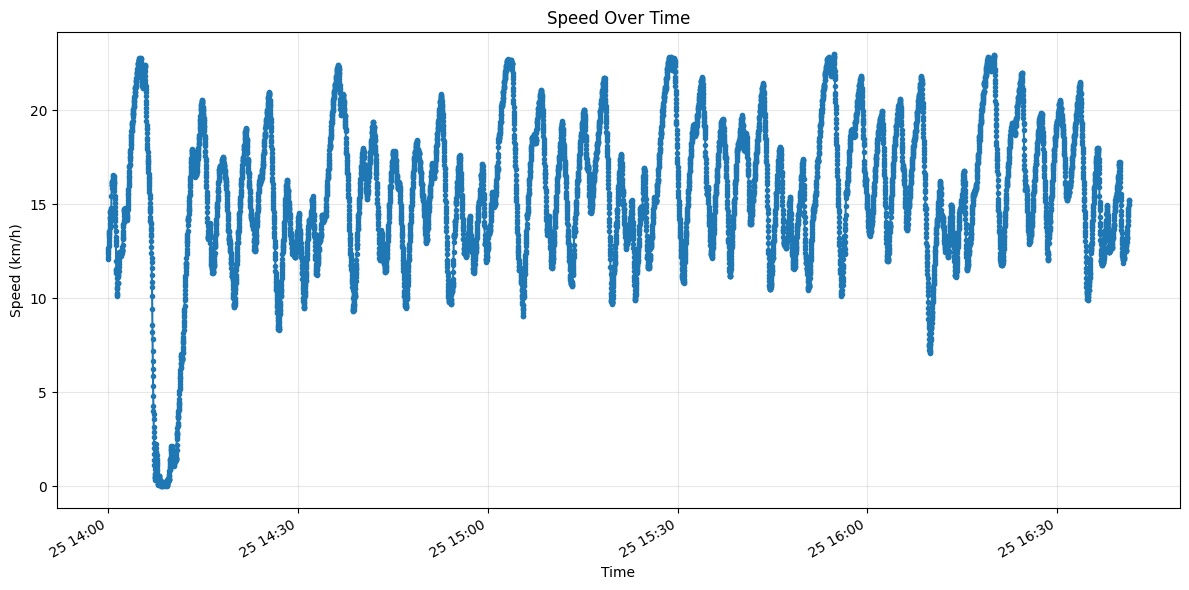

In [13]:
# Example with time (replace with your actual start time)
start = datetime.strptime("2025-12-25 14:00:00", "%Y-%m-%d %H:%M:%S")
plot_speeds(gps_speeds, start_time=start, time_interval=1)  # 1 second between measurements

In [14]:
def plot_speeds(gps_speeds, start_time=None, time_interval=1):
    """
    Plots GPS speeds over time or index, highlighting max speed and showing average speed.
    
    Args:
        gps_speeds: List of speed values in km/h
        start_time: (Optional) datetime object for the first data point.
                   If None, uses index numbers on x-axis.
        time_interval: Time interval in seconds between measurements (default: 1s)
    """
    plt.figure(figsize=(12, 6))
    
    # Calculate statistics
    max_speed = max(gps_speeds)
    avg_speed = sum(gps_speeds) / len(gps_speeds)
    max_idx = gps_speeds.index(max_speed)
    
    if start_time:
        # Create time points
        times = [start_time + timedelta(seconds=i*time_interval) 
                for i in range(len(gps_speeds))]
        x_values = times
        max_x = times[max_idx]
    else:
        x_values = range(len(gps_speeds))
        max_x = max_idx
    
    # Plot the main speed line
    line = plt.plot(x_values, gps_speeds, '-o', markersize=3, label='Speed', alpha=0.7)
    
    # Highlight max speed
    plt.scatter([max_x], [max_speed], color='red', s=100, zorder=5, 
               label=f'Max: {max_speed:.1f} km/h')
    
    # Add average speed line
    plt.axhline(y=avg_speed, color='green', linestyle='--', 
               label=f'Avg: {avg_speed:.1f} km/h')
    
    # Add labels and title
    if start_time:
        plt.gcf().autofmt_xdate()  # Auto-format time labels
        plt.xlabel('Time')
    else:
        plt.xlabel('Measurement Index')
    
    plt.ylabel('Speed (km/h)')
    title = 'Speed Over Time' if start_time else 'Speed vs Measurement Index'
    plt.title(f'{title}\nMax: {max_speed:.1f} km/h, Avg: {avg_speed:.1f} km/h')
    
    # Add grid and legend
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.show()

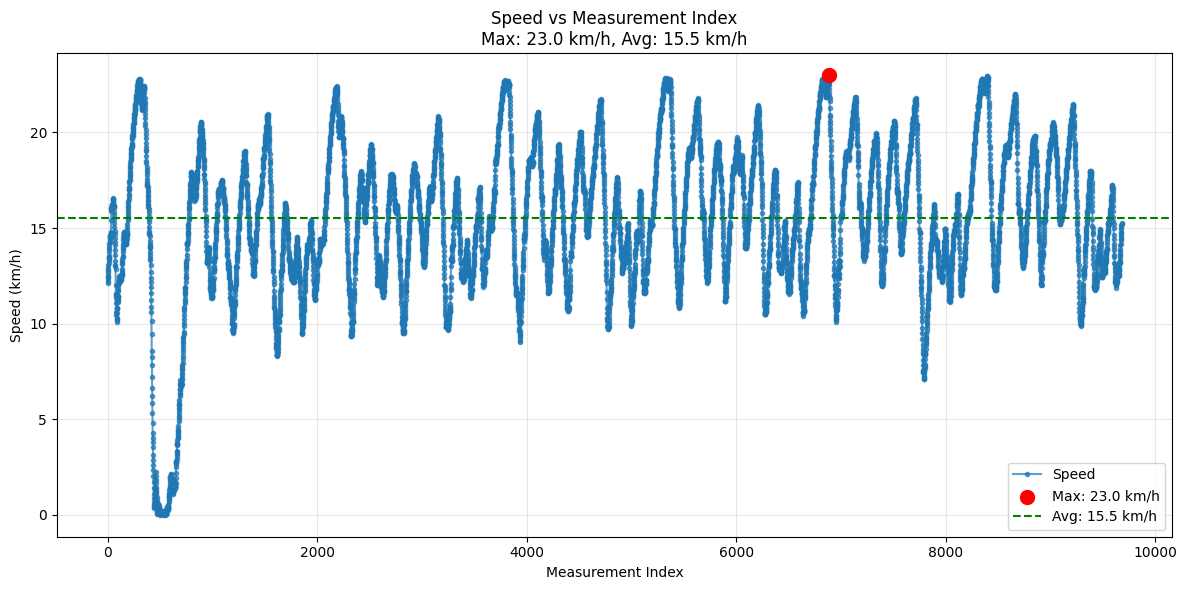

In [15]:
# With time
# plot_speeds(gps_speeds, start_time=your_start_time, time_interval=1)

# Or without time
plot_speeds(gps_speeds)

In [16]:
def calculate_and_plot_acceleration(gps_speeds, time_interval=1):
    """
    Calculates and plots acceleration from speed data.
    
    Args:
        gps_speeds: List of speed values in km/h
        time_interval: Time interval in seconds between measurements (default: 1s)
    """
    # Convert speeds from km/h to m/s for acceleration calculation (standard SI units)
    speeds_mps = [s / 3.6 for s in gps_speeds]
    
    # Calculate acceleration (dv/dt)
    accelerations = []
    for i in range(1, len(speeds_mps)):
        dv = speeds_mps[i] - speeds_mps[i-1]
        dt = time_interval  # seconds
        accelerations.append(dv / dt)  # m/s²
    
    # Calculate statistics
    max_accel = max(accelerations) if accelerations else 0
    min_accel = min(accelerations) if accelerations else 0
    avg_accel = sum(accelerations) / len(accelerations) if accelerations else 0
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
    
    # Plot speed
    ax1.plot(gps_speeds, '-o', markersize=3, label='Speed', alpha=0.7)
    ax1.set_ylabel('Speed (km/h)')
    ax1.set_title('Speed and Acceleration Over Time')
    ax1.grid(True, alpha=0.3)
    
    # Plot acceleration
    ax2.plot(accelerations, '-o', markersize=3, color='orange', label='Acceleration', alpha=0.7)
    
    # Add zero line and average acceleration
    ax2.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    ax2.axhline(y=avg_accel, color='green', linestyle='--', 
               label=f'Avg: {avg_accel:.2f} m/s²')
    
    # Highlight max acceleration
    max_idx = accelerations.index(max_accel)
    ax2.scatter([max_idx], [max_accel], color='red', s=100, zorder=5,
               label=f'Max: {max_accel:.2f} m/s²')
    
    # Highlight min acceleration (deceleration)
    min_idx = accelerations.index(min_accel)
    ax2.scatter([min_idx], [min_accel], color='blue', s=100, zorder=5,
               label=f'Min: {min_accel:.2f} m/s²')
    
    # Set labels and grid
    ax2.set_xlabel('Measurement Index')
    ax2.set_ylabel('Acceleration (m/s²)')
    ax2.grid(True, alpha=0.3)
    
    # Add legends
    ax1.legend()
    ax2.legend()
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("Acceleration Statistics:")
    print(f"Maximum Acceleration: {max_accel:.2f} m/s²")
    print(f"Maximum Deceleration: {abs(min_accel):.2f} m/s² (braking)")
    print(f"Average Acceleration: {avg_accel:.2f} m/s²")

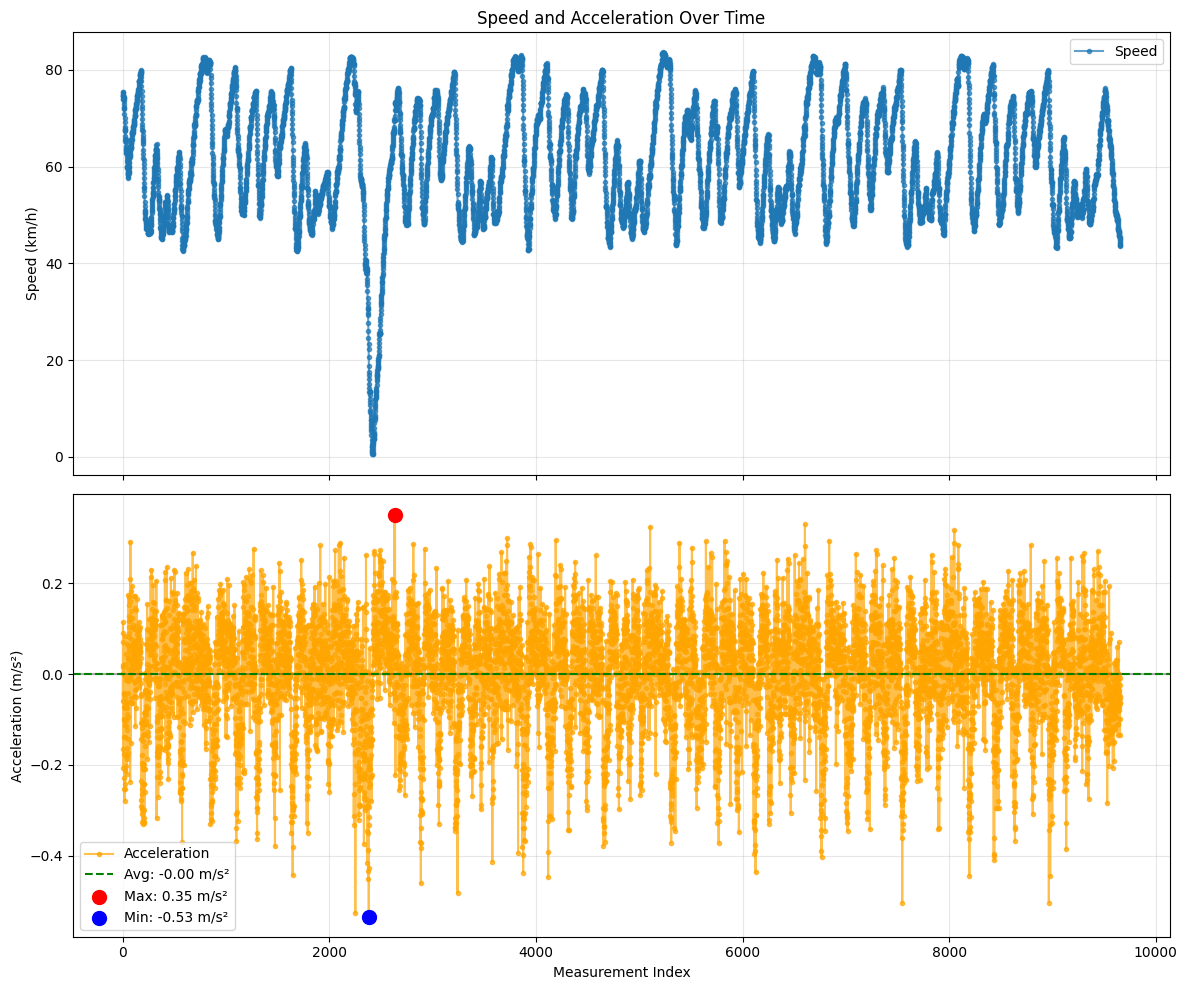

Acceleration Statistics:
Maximum Acceleration: 0.35 m/s²
Maximum Deceleration: 0.53 m/s² (braking)
Average Acceleration: -0.00 m/s²


In [28]:
calculate_and_plot_acceleration(gps_speeds, time_interval=1)  # Assuming 1 second between measurements

In [18]:
def analyze_acceleration_to_max_speed(gps_speeds, time_interval=1):
    """
    Analyzes acceleration from a point below 50 km/h to max speed.
    
    Args:
        gps_speeds: List of speed values in km/h
        time_interval: Time interval in seconds between measurements (default: 1s)
    """
    if not gps_speeds:
        print("No speed data provided.")
        return

    max_speed = max(gps_speeds)
    max_idx = gps_speeds.index(max_speed)
    
    # Find the first point below 50 km/h before max speed
    start_idx = None
    for i in range(max_idx - 1, -1, -1):
        if gps_speeds[i] <= 50:
            start_idx = i
            break
    
    if start_idx is None:
        print("Could not find a point below 50 km/h before the maximum speed.")
        return
    
    # Calculate time and distance of the acceleration phase
    time_to_max = (max_idx - start_idx) * time_interval
    start_speed = gps_speeds[start_idx]
    speed_difference = max_speed - start_speed
    
    # Calculate average acceleration (converting km/h to m/s)
    avg_accel = (speed_difference / 3.6) / time_to_max  # in m/s²
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot all speeds
    plt.plot(gps_speeds, '-', color='lightgray', label='Speed', alpha=0.5)
    
    # Highlight the acceleration phase
    acceleration_phase = range(start_idx, max_idx + 1)
    plt.plot(acceleration_phase, 
             gps_speeds[start_idx:max_idx + 1], 
             '-o', color='blue', 
             label='Acceleration Phase')
    
    # Mark key points
    plt.scatter([start_idx, max_idx], 
                [start_speed, max_speed], 
                color=['green', 'red'], s=100, zorder=5)
    
    # Add annotations
    plt.annotate(f'Start: {start_speed:.1f} km/h', 
                 (start_idx, start_speed),
                 textcoords="offset points", 
                 xytext=(10,10), 
                 ha='left')
    
    plt.annotate(f'Max: {max_speed:.1f} km/h', 
                 (max_idx, max_speed),
                 textcoords="offset points", 
                 xytext=(10,-15), 
                 ha='left')
    
    # Add title and labels
    plt.title(f'Acceleration Analysis\n'
              f'Average Acceleration: {avg_accel:.2f} m/s² from {start_speed:.1f} km/h to {max_speed:.1f} km/h\n'
              f'Time: {time_to_max:.1f} seconds')
    
    plt.xlabel('Measurement Index')
    plt.ylabel('Speed (km/h)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    plt.tight_layout()
    
    # Print detailed results
    print("="*60)
    print("ACCELERATION ANALYSIS")
    print("="*60)
    print(f"Starting speed: {start_speed:.1f} km/h at index {start_idx}")
    print(f"Maximum speed: {max_speed:.1f} km/h at index {max_idx}")
    print(f"Time to accelerate: {time_to_max:.1f} seconds")
    print(f"Average acceleration: {avg_accel:.2f} m/s²")
    print("="*60)
    
    plt.show()

ACCELERATION ANALYSIS
Starting speed: 23.0 km/h at index 6882
Maximum speed: 23.0 km/h at index 6883
Time to accelerate: 1.0 seconds
Average acceleration: 0.00 m/s²


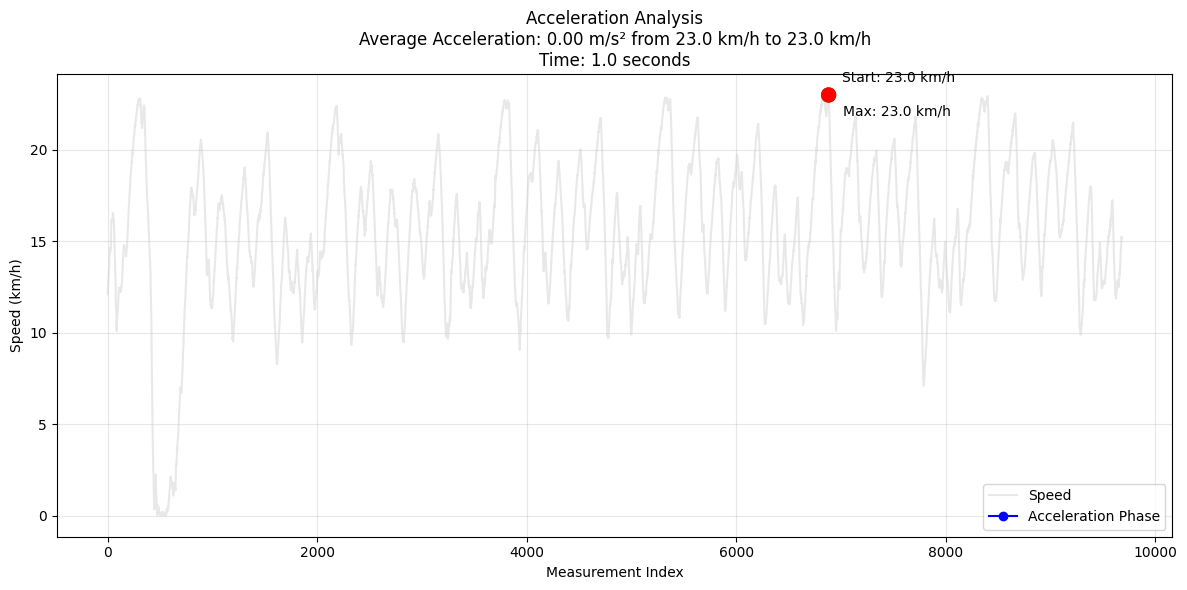

In [19]:
analyze_acceleration_to_max_speed(gps_speeds, time_interval=1)

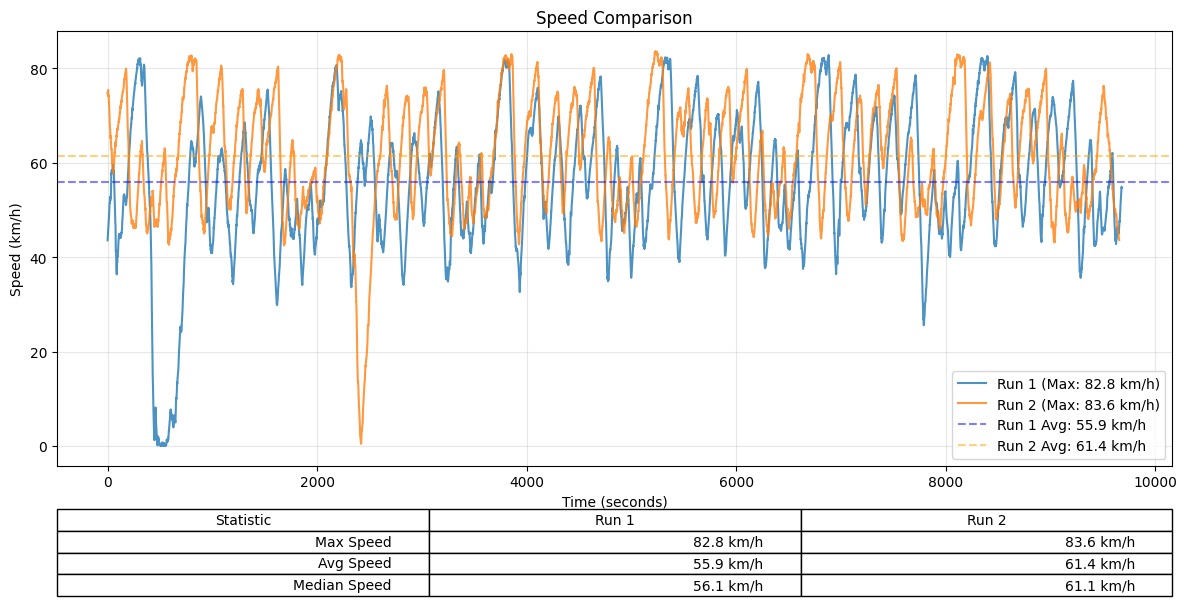

In [22]:
import re
import numpy as np
import matplotlib.pyplot as plt

def extract_gps_speeds(filename):
    with open(filename, 'r', encoding='utf-16-le') as file:
        content = file.read()
    speed_pattern = r"GPS Speed\s+:\s+([\d.]+)"
    speeds = re.findall(speed_pattern, content)
    return [float(speed) for speed in speeds]

def plot_compare_speeds(file1, file2, label1="File 1", label2="File 2", time_interval=1):
    # Extract speeds from both files
    speeds1 = extract_gps_speeds(file1)
    speeds2 = extract_gps_speeds(file2)
    
    # Create time arrays based on the index and time_interval
    time1 = np.arange(0, len(speeds1)) * time_interval
    time2 = np.arange(0, len(speeds2)) * time_interval
    
    # Calculate statistics
    stats1 = {
        'max': np.max(speeds1),
        'avg': np.mean(speeds1),
        'median': np.median(speeds1)
    }
    
    stats2 = {
        'max': np.max(speeds2),
        'avg': np.mean(speeds2),
        'median': np.median(speeds2)
    }
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot both speed profiles
    plt.plot(time1, speeds1, label=f'{label1} (Max: {stats1["max"]:.1f} km/h)', alpha=0.8)
    plt.plot(time2, speeds2, label=f'{label2} (Max: {stats2["max"]:.1f} km/h)', alpha=0.8)
    
    # Add average lines
    plt.axhline(y=stats1['avg'], color='blue', linestyle='--', alpha=0.5, 
               label=f'{label1} Avg: {stats1["avg"]:.1f} km/h')
    plt.axhline(y=stats2['avg'], color='orange', linestyle='--', alpha=0.5, 
               label=f'{label2} Avg: {stats2["avg"]:.1f} km/h')
    
    # Add labels and title
    plt.title('Speed Comparison')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Speed (km/h)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add a table with statistics
    col_labels = ['Statistic', label1, label2]
    cell_text = [
        ['Max Speed', f'{stats1["max"]:.1f} km/h', f'{stats2["max"]:.1f} km/h'],
        ['Avg Speed', f'{stats1["avg"]:.1f} km/h', f'{stats2["avg"]:.1f} km/h'],
        ['Median Speed', f'{stats1["median"]:.1f} km/h', f'{stats2["median"]:.1f} km/h']
    ]
    
    # Add the table at the bottom of the plot
    plt.table(cellText=cell_text,
              colLabels=col_labels,
              loc='bottom',
              bbox=[0, -0.3, 1, 0.2])
    
    # Adjust layout to make room for the table
    plt.subplots_adjust(bottom=0.25)
    
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    file1 = "output-kart25dec-1b.txt"
    file2 = "output-kart25dec-2b.txt"
    plot_compare_speeds(file1, file2, label1="Run 1", label2="Run 2", time_interval=1)

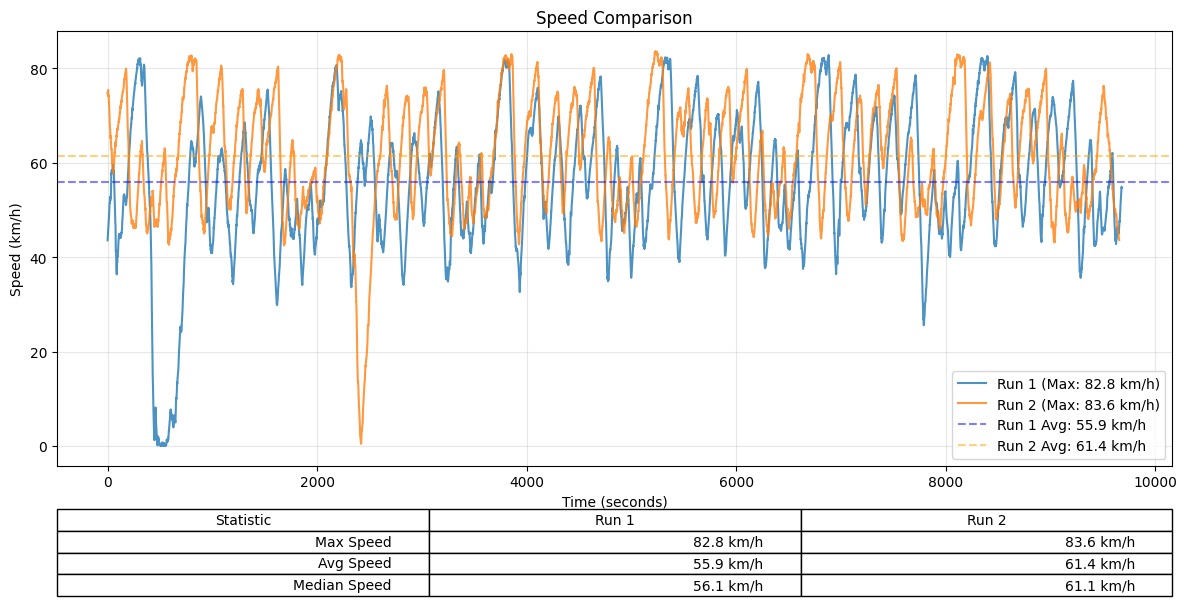

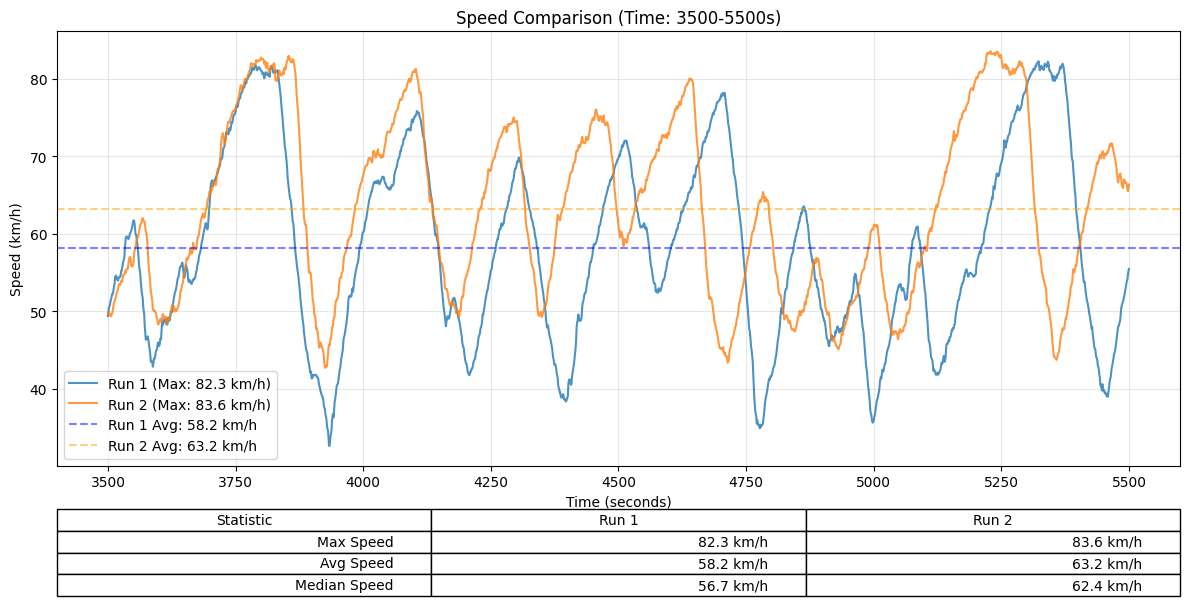

In [23]:
def plot_compare_speeds(file1, file2, label1="File 1", label2="File 2", 
                       time_interval=1, time_range=None):
    """
    Compare speed profiles from two files with optional time filtering.
    
    Args:
        file1, file2: Paths to the GPS data files
        label1, label2: Labels for the legend
        time_interval: Time between measurements in seconds
        time_range: Tuple of (start_time, end_time) in seconds to filter the data
    """
    # Extract speeds from both files
    speeds1 = extract_gps_speeds(file1)
    speeds2 = extract_gps_speeds(file2)
    
    # Create time arrays
    time1 = np.arange(0, len(speeds1)) * time_interval
    time2 = np.arange(0, len(speeds2)) * time_interval
    
    # Apply time filtering if requested
    if time_range:
        start_time, end_time = time_range
        mask1 = (time1 >= start_time) & (time1 <= end_time)
        mask2 = (time2 >= start_time) & (time2 <= end_time)
        
        time1 = time1[mask1]
        speeds1 = np.array(speeds1)[mask1]
        time2 = time2[mask2]
        speeds2 = np.array(speeds2)[mask2]
    
    # Calculate statistics on filtered data
    stats1 = {
        'max': np.max(speeds1) if len(speeds1) > 0 else 0,
        'avg': np.mean(speeds1) if len(speeds1) > 0 else 0,
        'median': np.median(speeds1) if len(speeds1) > 0 else 0
    }
    
    stats2 = {
        'max': np.max(speeds2) if len(speeds2) > 0 else 0,
        'avg': np.mean(speeds2) if len(speeds2) > 0 else 0,
        'median': np.median(speeds2) if len(speeds2) > 0 else 0
    }
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    
    # Plot both speed profiles
    plt.plot(time1, speeds1, label=f'{label1} (Max: {stats1["max"]:.1f} km/h)', alpha=0.8)
    plt.plot(time2, speeds2, label=f'{label2} (Max: {stats2["max"]:.1f} km/h)', alpha=0.8)
    
    # Add average lines
    plt.axhline(y=stats1['avg'], color='blue', linestyle='--', alpha=0.5, 
               label=f'{label1} Avg: {stats1["avg"]:.1f} km/h')
    plt.axhline(y=stats2['avg'], color='orange', linestyle='--', alpha=0.5, 
               label=f'{label2} Avg: {stats2["avg"]:.1f} km/h')
    
    # Add labels and title
    time_range_text = f" (Time: {time_range[0]}-{time_range[1]}s)" if time_range else ""
    plt.title(f'Speed Comparison{time_range_text}')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Speed (km/h)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add a table with statistics
    col_labels = ['Statistic', label1, label2]
    cell_text = [
        ['Max Speed', f'{stats1["max"]:.1f} km/h', f'{stats2["max"]:.1f} km/h'],
        ['Avg Speed', f'{stats1["avg"]:.1f} km/h', f'{stats2["avg"]:.1f} km/h'],
        ['Median Speed', f'{stats1["median"]:.1f} km/h', f'{stats2["median"]:.1f} km/h']
    ]
    
    # Add the table at the bottom of the plot
    plt.table(cellText=cell_text,
              colLabels=col_labels,
              loc='bottom',
              bbox=[0, -0.3, 1, 0.2])
    
    # Adjust layout to make room for the table
    plt.subplots_adjust(bottom=0.25)
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    file1 = "output-kart25dec-1b.txt"
    file2 = "output-kart25dec-2b.txt"
    
    # Plot full comparison
    plot_compare_speeds(file1, file2, label1="Run 1", label2="Run 2", time_interval=1)
    
    # Plot filtered comparison (example: between 3700 and 10000 seconds)
    plot_compare_speeds(file1, file2, label1="Run 1", label2="Run 2", 
                       time_interval=1, time_range=(3500, 5500))

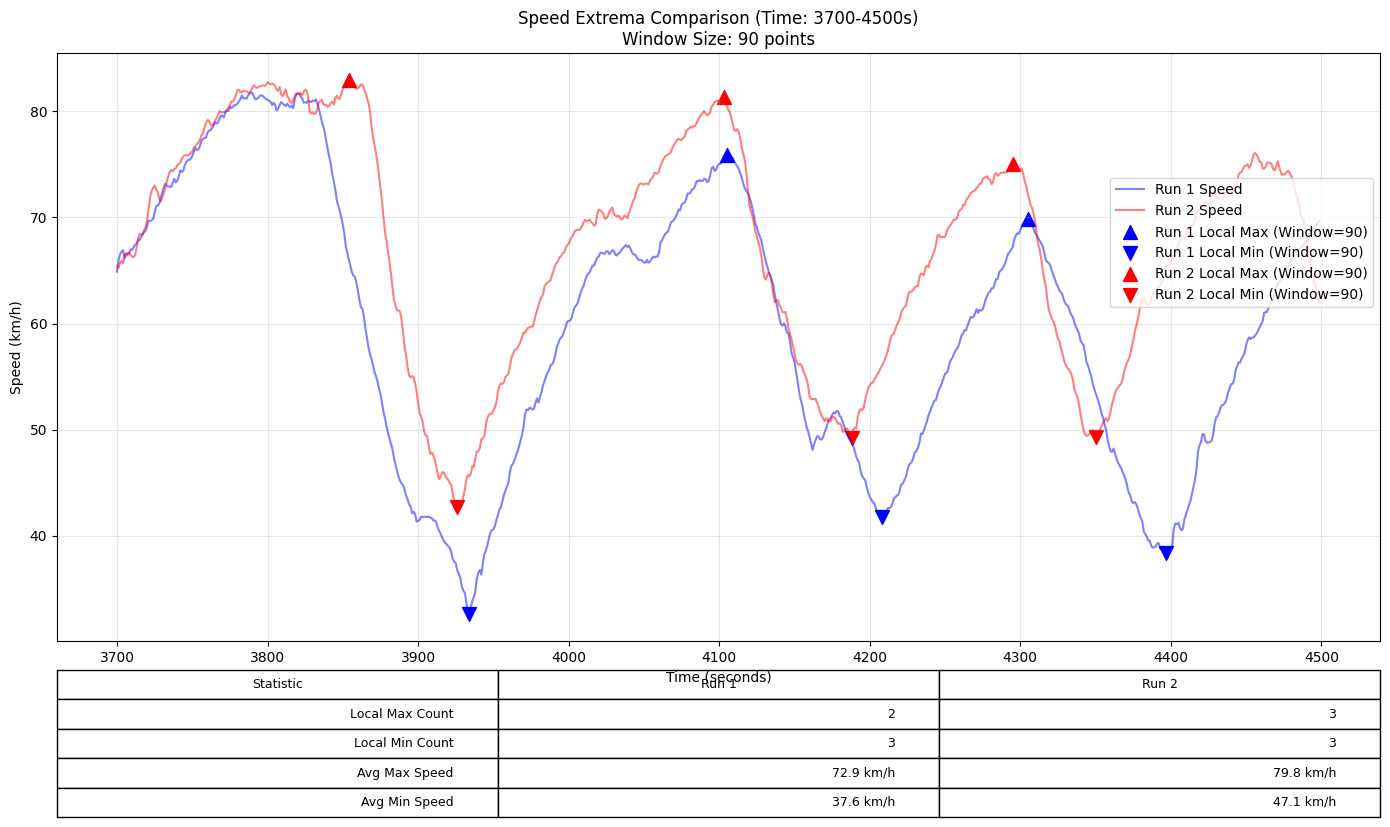


EXTREMA COMPARISON (Window Size: 90 points)
Run 1: 2 local maxima, 3 local minima
  - Max speeds: 75.9 km/h, 69.9 km/h
  - Min speeds: 32.6 km/h, 41.7 km/h, 38.4 km/h

Run 2: 3 local maxima, 3 local minima
  - Max speeds: 83.0 km/h, 81.3 km/h, 75.0 km/h
  - Min speeds: 42.7 km/h, 49.2 km/h, 49.3 km/h


In [24]:
def find_local_extrema(speeds, window=5, mode='max'):
    """
    Find local maxima or minima in a list of speeds.
    
    Args:
        speeds: List of speed values
        window: Number of points to consider on each side
        mode: 'max' to find local maxima, 'min' for local minima
        
    Returns:
        List of (index, speed) tuples for the extrema points
    """
    extrema = []
    for i in range(window, len(speeds)-window):
        center = speeds[i]
        left = speeds[i-window:i]
        right = speeds[i+1:i+window+1]
        
        if mode == 'max' and all(center >= x for x in left + right):
            extrema.append((i, center))
        elif mode == 'min' and all(center <= x for x in left + right):
            extrema.append((i, center))
    return extrema

def plot_speed_extrema_comparison(file1, file2, label1="File 1", label2="File 2", 
                                 time_interval=1, time_range=None, window=5):
    """
    Compare local maxima and minima between two speed profiles.
    
    Args:
        file1, file2: Paths to the GPS data files
        label1, label2: Labels for the legend
        time_interval: Time between measurements in seconds
        time_range: Tuple of (start_time, end_time) in seconds to filter the data
        window: Number of points to consider on each side when finding extrema
    """
    # Extract and filter speeds
    speeds1 = extract_gps_speeds(file1)
    speeds2 = extract_gps_speeds(file2)
    
    # Create time arrays
    time1 = np.arange(0, len(speeds1)) * time_interval
    time2 = np.arange(0, len(speeds2)) * time_interval
    
    # Apply time filtering if requested
    if time_range:
        start_idx1 = int(time_range[0] / time_interval)
        end_idx1 = min(int(time_range[1] / time_interval), len(speeds1))
        start_idx2 = int(time_range[0] / time_interval)
        end_idx2 = min(int(time_range[1] / time_interval), len(speeds2))
        
        speeds1 = speeds1[start_idx1:end_idx1]
        time1 = time1[start_idx1:end_idx1]
        speeds2 = speeds2[start_idx2:end_idx2]
        time2 = time2[start_idx2:end_idx2]
    
    # Find local maxima and minima
    max1 = find_local_extrema(speeds1, window, 'max')
    min1 = find_local_extrema(speeds1, window, 'min')
    max2 = find_local_extrema(speeds2, window, 'max')
    min2 = find_local_extrema(speeds2, window, 'min')
    
    # Create the plot
    plt.figure(figsize=(14, 8))
    
    # Plot both speed profiles
    plt.plot(time1, speeds1, 'b-', alpha=0.5, label=f'{label1} Speed')
    plt.plot(time2, speeds2, 'r-', alpha=0.5, label=f'{label2} Speed')
    
    # Plot extrema
    if max1:
        max1_times = [time1[i] for i, _ in max1]
        max1_speeds = [s for _, s in max1]
        plt.scatter(max1_times, max1_speeds, c='blue', marker='^', s=100, 
                   label=f'{label1} Local Max (Window={window})')
    
    if min1:
        min1_times = [time1[i] for i, _ in min1]
        min1_speeds = [s for _, s in min1]
        plt.scatter(min1_times, min1_speeds, c='blue', marker='v', s=100, 
                   label=f'{label1} Local Min (Window={window})')
    
    if max2:
        max2_times = [time2[i] for i, _ in max2]
        max2_speeds = [s for _, s in max2]
        plt.scatter(max2_times, max2_speeds, c='red', marker='^', s=100, 
                   label=f'{label2} Local Max (Window={window})')
    
    if min2:
        min2_times = [time2[i] for i, _ in min2]
        min2_speeds = [s for _, s in min2]
        plt.scatter(min2_times, min2_speeds, c='red', marker='v', s=100, 
                   label=f'{label2} Local Min (Window={window})')
    
    # Add statistics table
    stats_data = [
        ['Local Max Count', len(max1), len(max2)],
        ['Local Min Count', len(min1), len(min2)],
        ['Avg Max Speed', 
         f"{np.mean([s for _, s in max1]):.1f} km/h" if max1 else 'N/A', 
         f"{np.mean([s for _, s in max2]):.1f} km/h" if max2 else 'N/A'],
        ['Avg Min Speed', 
         f"{np.mean([s for _, s in min1]):.1f} km/h" if min1 else 'N/A', 
         f"{np.mean([s for _, s in min2]):.1f} km/h" if min2 else 'N/A']
    ]
    
    table = plt.table(cellText=stats_data,
                     colLabels=['Statistic', label1, label2],
                     loc='bottom',
                     bbox=[0, -0.3, 1, 0.25])
    
    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(9)
    table.scale(1, 1.5)
    
    # Add labels and title
    time_range_text = f" (Time: {time_range[0]}-{time_range[1]}s)" if time_range else ""
    plt.title(f'Speed Extrema Comparison{time_range_text}\nWindow Size: {window} points')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Speed (km/h)')
    plt.legend(loc='upper right', bbox_to_anchor=(1, 0.8))
    plt.grid(True, alpha=0.3)
    
    # Adjust layout
    plt.subplots_adjust(bottom=0.3)
    plt.tight_layout()
    plt.show()
    
    # Print detailed statistics
    print("\n" + "="*60)
    print(f"EXTREMA COMPARISON (Window Size: {window} points)")
    print("="*60)
    print(f"{label1}: {len(max1)} local maxima, {len(min1)} local minima")
    if max1:
        print(f"  - Max speeds: {', '.join([f'{s:.1f} km/h' for _, s in max1])}")
    if min1:
        print(f"  - Min speeds: {', '.join([f'{s:.1f} km/h' for _, s in min1])}")
    
    print(f"\n{label2}: {len(max2)} local maxima, {len(min2)} local minima")
    if max2:
        print(f"  - Max speeds: {', '.join([f'{s:.1f} km/h' for _, s in max2])}")
    if min2:
        print(f"  - Min speeds: {', '.join([f'{s:.1f} km/h' for _, s in min2])}")

# Example usage:
if __name__ == "__main__":
    file1 = "output-kart25dec-1b.txt"
    file2 = "output-kart25dec-2b.txt"
    
    # Compare with default window size (5 points on each side)
    plot_speed_extrema_comparison(
        file1, file2, 
        label1="Run 1", 
        label2="Run 2",
        time_interval=1,
        time_range=(3700, 4500),  # Example time range
        window=90  # Number of points to consider on each side
    )

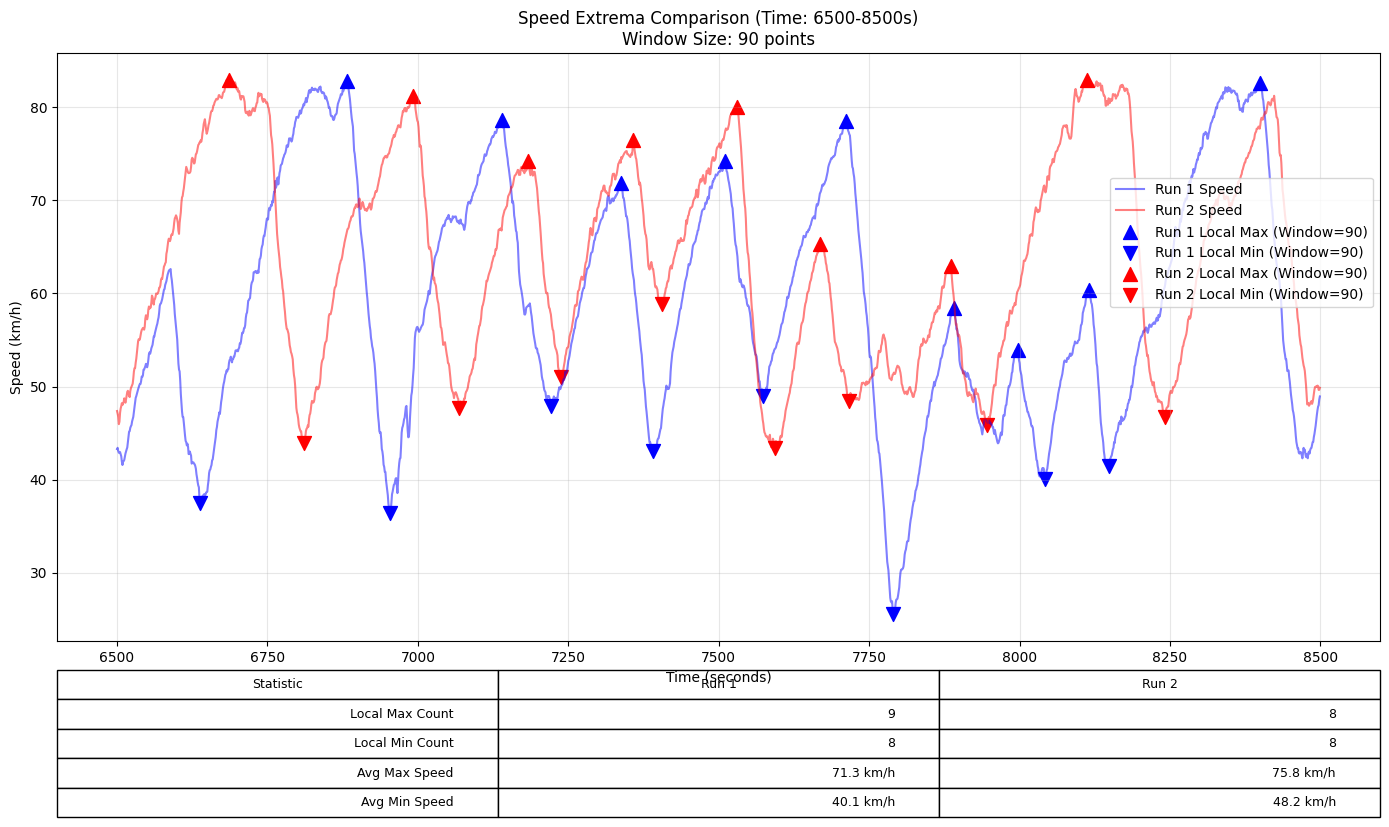


EXTREMA COMPARISON (Window Size: 90 points)
Run 1: 9 local maxima, 8 local minima
  - Max speeds: 82.8 km/h, 78.6 km/h, 71.9 km/h, 74.2 km/h, 78.5 km/h, 58.5 km/h, 53.9 km/h, 60.4 km/h, 82.6 km/h
  - Min speeds: 37.5 km/h, 36.4 km/h, 47.9 km/h, 43.1 km/h, 49.0 km/h, 25.6 km/h, 40.0 km/h, 41.5 km/h

Run 2: 8 local maxima, 8 local minima
  - Max speeds: 82.9 km/h, 81.2 km/h, 74.2 km/h, 76.5 km/h, 80.0 km/h, 65.3 km/h, 62.9 km/h, 82.9 km/h
  - Min speeds: 43.9 km/h, 47.7 km/h, 51.0 km/h, 58.8 km/h, 43.5 km/h, 48.4 km/h, 45.9 km/h, 46.7 km/h


In [25]:

# Example usage:
if __name__ == "__main__":
    file1 = "output-kart25dec-1b.txt"
    file2 = "output-kart25dec-2b.txt"
    
    # Compare with default window size (5 points on each side)
    plot_speed_extrema_comparison(
        file1, file2, 
        label1="Run 1", 
        label2="Run 2",
        time_interval=1,
        time_range=(6500, 8500),  # Example time range
        window=90  # Number of points to consider on each side
    )

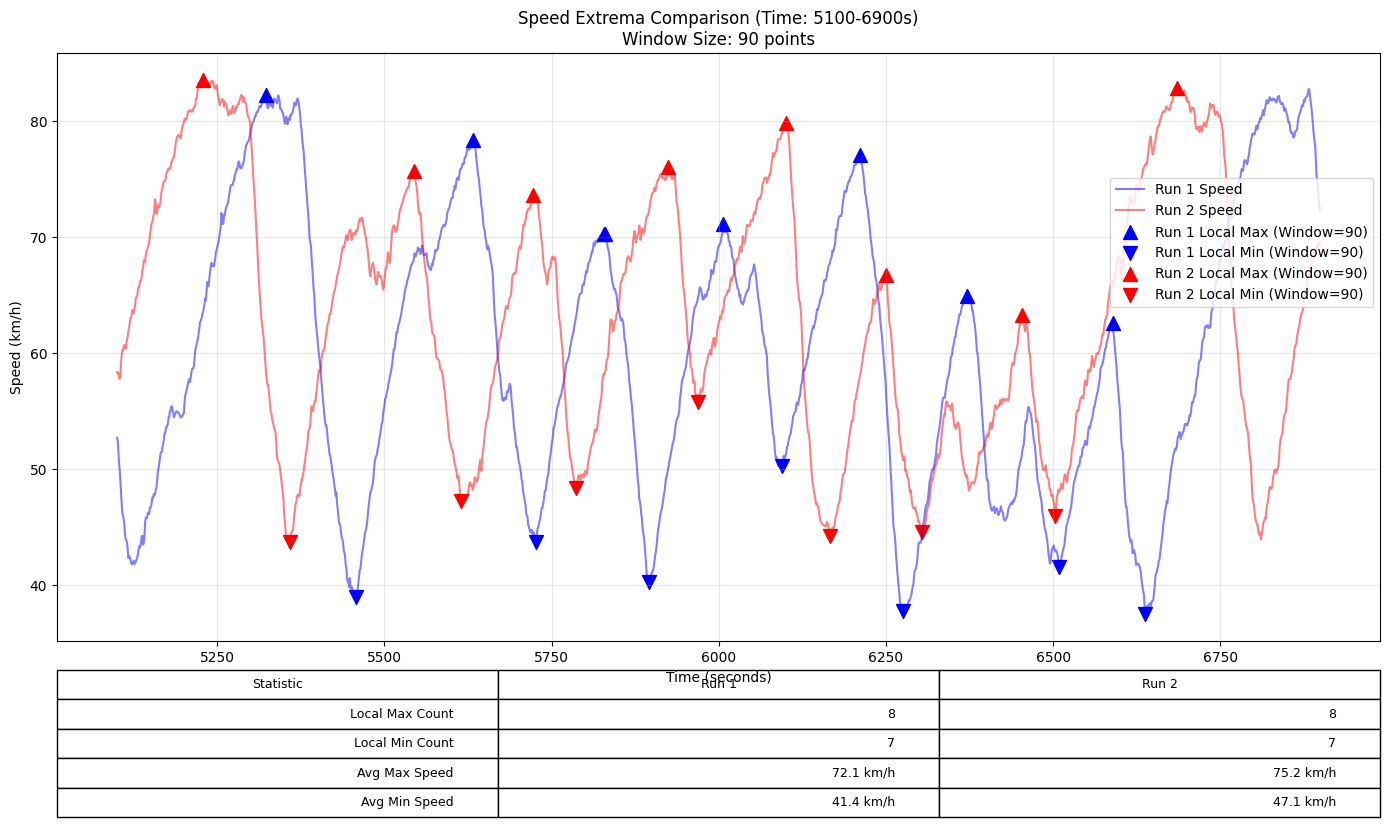


EXTREMA COMPARISON (Window Size: 90 points)
Run 1: 8 local maxima, 7 local minima
  - Max speeds: 82.3 km/h, 78.4 km/h, 70.3 km/h, 70.3 km/h, 71.1 km/h, 77.1 km/h, 65.0 km/h, 62.6 km/h
  - Min speeds: 39.0 km/h, 43.7 km/h, 40.3 km/h, 50.3 km/h, 37.7 km/h, 41.6 km/h, 37.5 km/h

Run 2: 8 local maxima, 7 local minima
  - Max speeds: 83.6 km/h, 75.8 km/h, 73.6 km/h, 76.0 km/h, 79.9 km/h, 66.8 km/h, 63.3 km/h, 82.9 km/h
  - Min speeds: 43.7 km/h, 47.2 km/h, 48.4 km/h, 55.8 km/h, 44.2 km/h, 44.6 km/h, 46.0 km/h


In [28]:
# Example usage:
if __name__ == "__main__":
    file1 = "output-kart25dec-1b.txt"
    file2 = "output-kart25dec-2b.txt"
    
    # Compare with default window size (5 points on each side)
    plot_speed_extrema_comparison(
        file1, file2, 
        label1="Run 1", 
        label2="Run 2",
        time_interval=1,
        time_range=(5100, 6900),  # Example time range
        window=90  # Number of points to consider on each side
    )

In [31]:
def find_matching_extrema_windows(file1, file2, time_interval=1, time_range=None, min_window=30, max_window=100):
    """
    Find window sizes where both runs have the same number of local maxima and minima.
    
    Args:
        file1, file2: Paths to the GPS data files
        time_interval: Time between measurements in seconds
        time_range: Tuple of (start_time, end_time) in seconds to filter the data
        min_window: Minimum window size to check (inclusive)
        max_window: Maximum window size to check (inclusive)
    """
    # Extract and filter speeds
    speeds1 = extract_gps_speeds(file1)
    speeds2 = extract_gps_speeds(file2)
    
    # Apply time filtering if requested
    if time_range:
        start_idx1 = int(time_range[0] / time_interval)
        end_idx1 = min(int(time_range[1] / time_interval), len(speeds1))
        start_idx2 = int(time_range[0] / time_interval)
        end_idx2 = min(int(time_range[1] / time_interval), len(speeds2))
        
        speeds1 = speeds1[start_idx1:end_idx1]
        speeds2 = speeds2[start_idx2:end_idx2]
    
    print(f"Analyzing window sizes from {min_window} to {max_window}...\n")
    print(f"{'Window':<10} {'Run 1 Max':<10} {'Run 2 Max':<10} {'Run 1 Min':<10} {'Run 2 Min':<10} {'Match'}")
    print("-" * 70)
    
    matches = []
    
    for window in range(min_window, max_window + 1):
        # Find local extrema for both runs
        max1 = find_local_extrema(speeds1, window, 'max')
        min1 = find_local_extrema(speeds1, window, 'min')
        max2 = find_local_extrema(speeds2, window, 'max')
        min2 = find_local_extrema(speeds2, window, 'min')
        
        # Check if both max and min counts match
        max_match = len(max1) == len(max2)
        min_match = len(min1) == len(min2)
        full_match = max_match and min_match
        
        # Print results for this window
        print(f"{window:<10} {len(max1):<10} {len(max2):<10} {len(min1):<10} {len(min2):<10} {'✓' if full_match else '✗'}")
        
        if full_match:
            matches.append(window)
    
    # Print summary
    print("\n" + "="*70)
    if matches:
        print(f"\nFound {len(matches)} window sizes with matching extrema counts:")
        for window in matches:
            max1 = len(find_local_extrema(speeds1, window, 'max'))
            min1 = len(find_local_extrema(speeds1, window, 'min'))
            print(f"Window={window}: {max1} maxima and {min1} minima in both runs")
    else:
        print("\nNo matching window sizes found in the given range.")
    
    return matches

# Example usage:
if __name__ == "__main__":
    file1 = "output-kart25dec-1b.txt"
    file2 = "output-kart25dec-2b.txt"
    
    # Find matching window sizes between 30 and 100
    matching_windows = find_matching_extrema_windows(
        file1, file2,
        time_interval=1,
        time_range=(5100, 6900),  # Same as your example
        min_window=30,
        max_window=100
    )

Analyzing window sizes from 30 to 100...

Window     Run 1 Max  Run 2 Max  Run 1 Min  Run 2 Min  Match
----------------------------------------------------------------------
30         11         12         10         11         ✗
31         10         12         8          11         ✗
32         10         11         8          11         ✗
33         10         11         8          11         ✗
34         10         11         8          11         ✗
35         10         11         8          11         ✗
36         10         10         8          10         ✗
37         10         10         8          10         ✗
38         10         10         8          10         ✗
39         10         10         8          10         ✗
40         10         10         8          10         ✗
41         10         10         8          10         ✗
42         10         10         8          10         ✗
43         9          10         8          10         ✗
44         9          10    

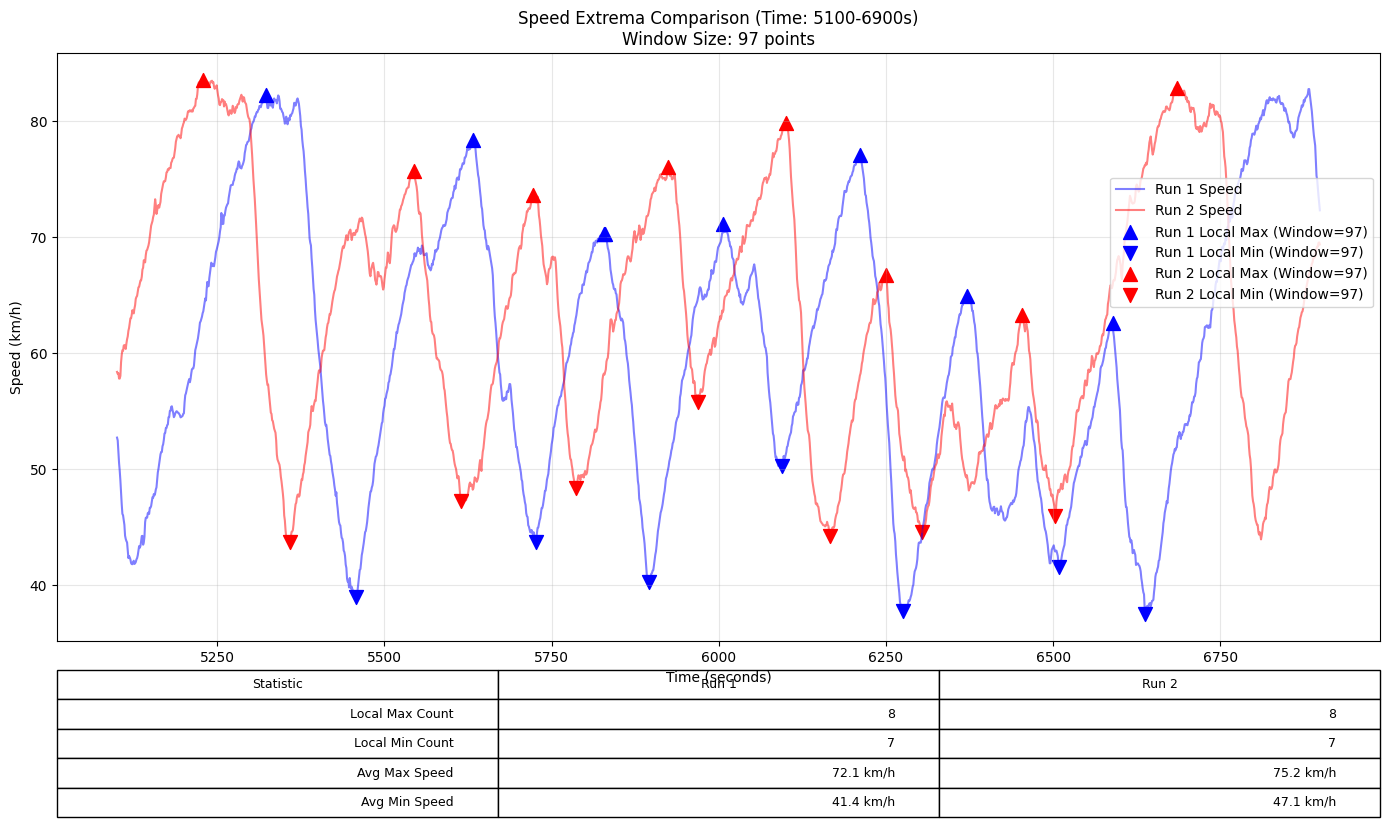


EXTREMA COMPARISON (Window Size: 97 points)
Run 1: 8 local maxima, 7 local minima
  - Max speeds: 82.3 km/h, 78.4 km/h, 70.3 km/h, 70.3 km/h, 71.1 km/h, 77.1 km/h, 65.0 km/h, 62.6 km/h
  - Min speeds: 39.0 km/h, 43.7 km/h, 40.3 km/h, 50.3 km/h, 37.7 km/h, 41.6 km/h, 37.5 km/h

Run 2: 8 local maxima, 7 local minima
  - Max speeds: 83.6 km/h, 75.8 km/h, 73.6 km/h, 76.0 km/h, 79.9 km/h, 66.8 km/h, 63.3 km/h, 82.9 km/h
  - Min speeds: 43.7 km/h, 47.2 km/h, 48.4 km/h, 55.8 km/h, 44.2 km/h, 44.6 km/h, 46.0 km/h


In [32]:
# Example usage:
if __name__ == "__main__":
    file1 = "output-kart25dec-1b.txt"
    file2 = "output-kart25dec-2b.txt"
    
    # Compare with default window size (5 points on each side)
    plot_speed_extrema_comparison(
        file1, file2, 
        label1="Run 1", 
        label2="Run 2",
        time_interval=1,
        time_range=(5100, 6900),  # Example time range
        window=97  # Number of points to consider on each side
    )

In [35]:
def extract_gps_data(filename):
    # First try reading as regular text, then try UTF-16-LE if that fails
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            content = file.read()
    except UnicodeDecodeError:
        try:
            with open(filename, 'r', encoding='utf-16-le') as file:
                content = file.read()
        except UnicodeDecodeError:
            with open(filename, 'r', encoding='latin-1') as file:  # Fallback encoding
                content = file.read()

    # Regular expressions to find GPS Speed 3D and GPS Date Time
    speed_3d_pattern = r"GPS Speed 3D\s+:\s+([\d.]+)"
    datetime_pattern = r"GPS Date Time\s+:\s+([\d:\.\s]+)"

    # Find all matches
    speeds_3d = re.findall(speed_3d_pattern, content)
    datetimes = re.findall(datetime_pattern, content)
    
    # Convert string speeds to float and clean up datetime strings
    speeds_3d = [float(speed) for speed in speeds_3d]
    datetimes = [dt.strip() for dt in datetimes]
    
    # Ensure we have matching lengths (in case of any parsing issues)
    min_length = min(len(speeds_3d), len(datetimes))
    speeds_3d = speeds_3d[:min_length]
    datetimes = datetimes[:min_length]
    
    return speeds_3d, datetimes

# Example usage:
if __name__ == "__main__":
    filename = "gopro-kart.txt"
    speeds_3d, datetimes = extract_gps_data(filename)
    
    if not speeds_3d or not datetimes:
        print("No GPS data found. Please check the file format.")
    else:
        # Create a DataFrame with the data
        try:
            import pandas as pd
            df = pd.DataFrame({
                'datetime': pd.to_datetime(datetimes, format='%Y:%m:%d %H:%M:%S.%f', errors='coerce'),
                'speed_3d_ms': speeds_3d
            }).dropna()  # Drop any rows with invalid datetime
            
            # Convert m/s to km/h (1 m/s = 3.6 km/h)
            df['speed_3d_kmh'] = df['speed_3d_ms'] * 3.6
            
            print("\nFirst 5 rows of GPS data:")
            print(df.head().to_string())
            
            # Basic statistics
            print("\nSpeed Statistics:")
            print(f"Max Speed: {df['speed_3d_kmh'].max():.2f} km/h")
            print(f"Average Speed: {df['speed_3d_kmh'].mean():.2f} km/h")
            print(f"Min Speed: {df['speed_3d_kmh'].min():.2f} km/h")
            
        except ImportError:
            # Fallback if pandas is not available
            print("\nPandas is not installed. Here are the first 5 speed values in km/h:")
            for i, (dt, speed_ms) in enumerate(zip(datetimes[:5], speeds_3d[:5])):
                print(f"Time: {dt}, Speed 3D: {speed_ms * 3.6:.2f} km/h")


First 5 rows of GPS data:
                 datetime  speed_3d_ms  speed_3d_kmh
0 2025-12-20 11:10:07.045        11.98        43.128
1 2025-12-20 11:10:08.035        12.10        43.560
2 2025-12-20 11:10:09.025        12.22        43.992
3 2025-12-20 11:10:10.015        12.36        44.496
4 2025-12-20 11:10:11.005        12.45        44.820

Speed Statistics:
Max Speed: 82.08 km/h
Average Speed: 48.91 km/h
Min Speed: 0.50 km/h


/tmp/ipykernel_361535/1973683475.py:68: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



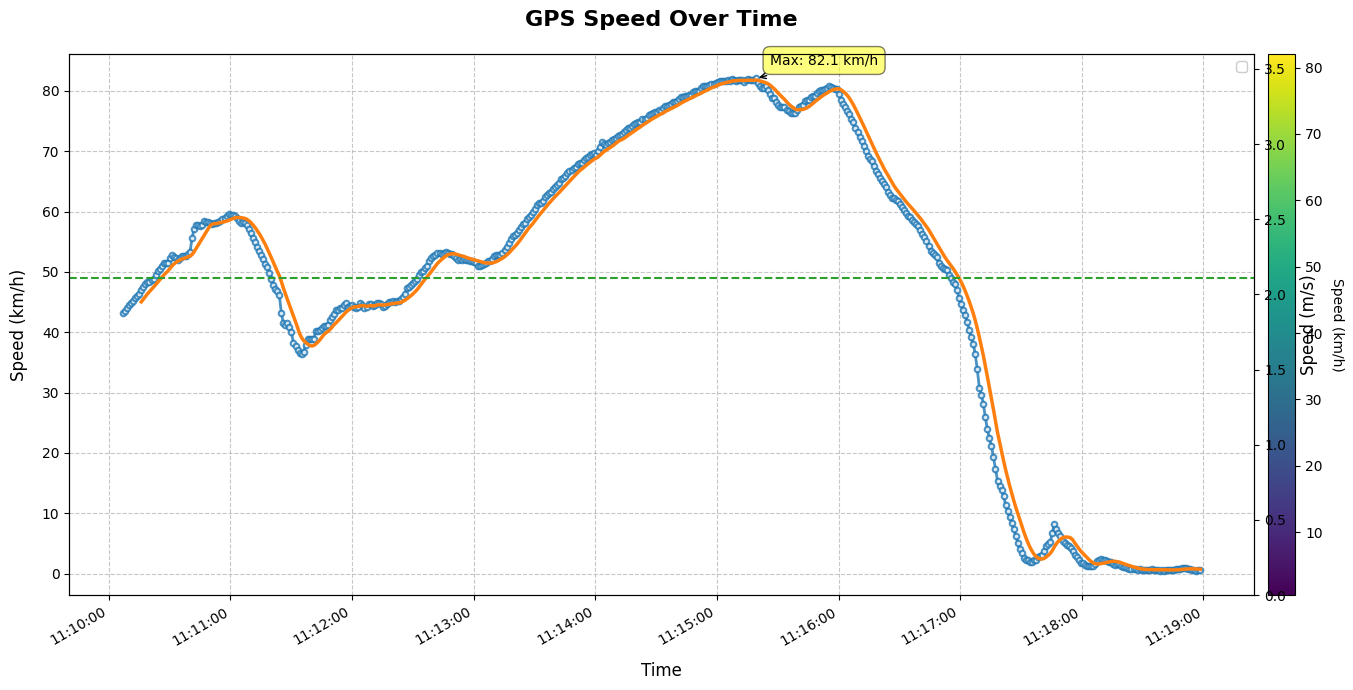

In [36]:
# Create the plot
plt.figure(figsize=(15, 7))

# Plot the speed data
plt.plot(df['datetime'], df['speed_3d_kmh'], 
         color='#1f77b4', linewidth=2, 
         marker='o', markersize=4, 
         markerfacecolor='white', 
         markeredgecolor='#1f77b4',
         markeredgewidth=1.5,
         alpha=0.8)

# Add a rolling average to show the trend
window_size = 10  # Number of points to average
if len(df) > window_size:
    df['rolling_avg'] = df['speed_3d_kmh'].rolling(window=window_size).mean()
    plt.plot(df['datetime'], df['rolling_avg'], 
             color='#ff7f0e', 
             linewidth=2.5, 
             label=f'Moving Average ({window_size} points)')

# Add a horizontal line for the average speed
avg_speed = df['speed_3d_kmh'].mean()
plt.axhline(y=avg_speed, color='#2ca02c', linestyle='--', 
            linewidth=1.5, 
            label=f'Average: {avg_speed:.1f} km/h')

# Customize the plot
plt.title('GPS Speed Over Time', fontsize=16, pad=20, fontweight='bold')
plt.xlabel('Time', fontsize=12, labelpad=10)
plt.ylabel('Speed (km/h)', fontsize=12, labelpad=10)
plt.grid(True, linestyle='--', alpha=0.7)

# Format x-axis to show time nicely
plt.gcf().autofmt_xdate()
date_format = '%H:%M:%S'  # Show hours, minutes, seconds
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter(date_format))

# Add a colorbar-like legend for speed intensity
sm = plt.cm.ScalarMappable(cmap='viridis', 
                          norm=plt.Normalize(vmin=df['speed_3d_kmh'].min(), 
                                           vmax=df['speed_3d_kmh'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=plt.gca(), pad=0.01)
cbar.set_label('Speed (km/h)', rotation=270, labelpad=15)

# Add some annotations
plt.annotate(f'Max: {df["speed_3d_kmh"].max():.1f} km/h',
             xy=(df['datetime'][df['speed_3d_kmh'].idxmax()], 
                 df['speed_3d_kmh'].max()),
             xytext=(10, 10), textcoords='offset points',
             bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
             arrowprops=dict(arrowstyle='->'))

# Add a second y-axis showing m/s
def kmh_to_ms(y):
    return y / 3.6

def ms_to_kmh(y):
    return y * 3.6

ax2 = plt.gca().twinx()
ax2.set_ylim(ms_to_kmh(plt.gca().get_ylim()[0]), 
             ms_to_kmh(plt.gca().get_ylim()[1]))
ax2.set_ylabel('Speed (m/s)', fontsize=12, labelpad=10)

# Add legend
plt.legend(loc='upper right', framealpha=1)

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

/tmp/ipykernel_361535/2810044103.py:128: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



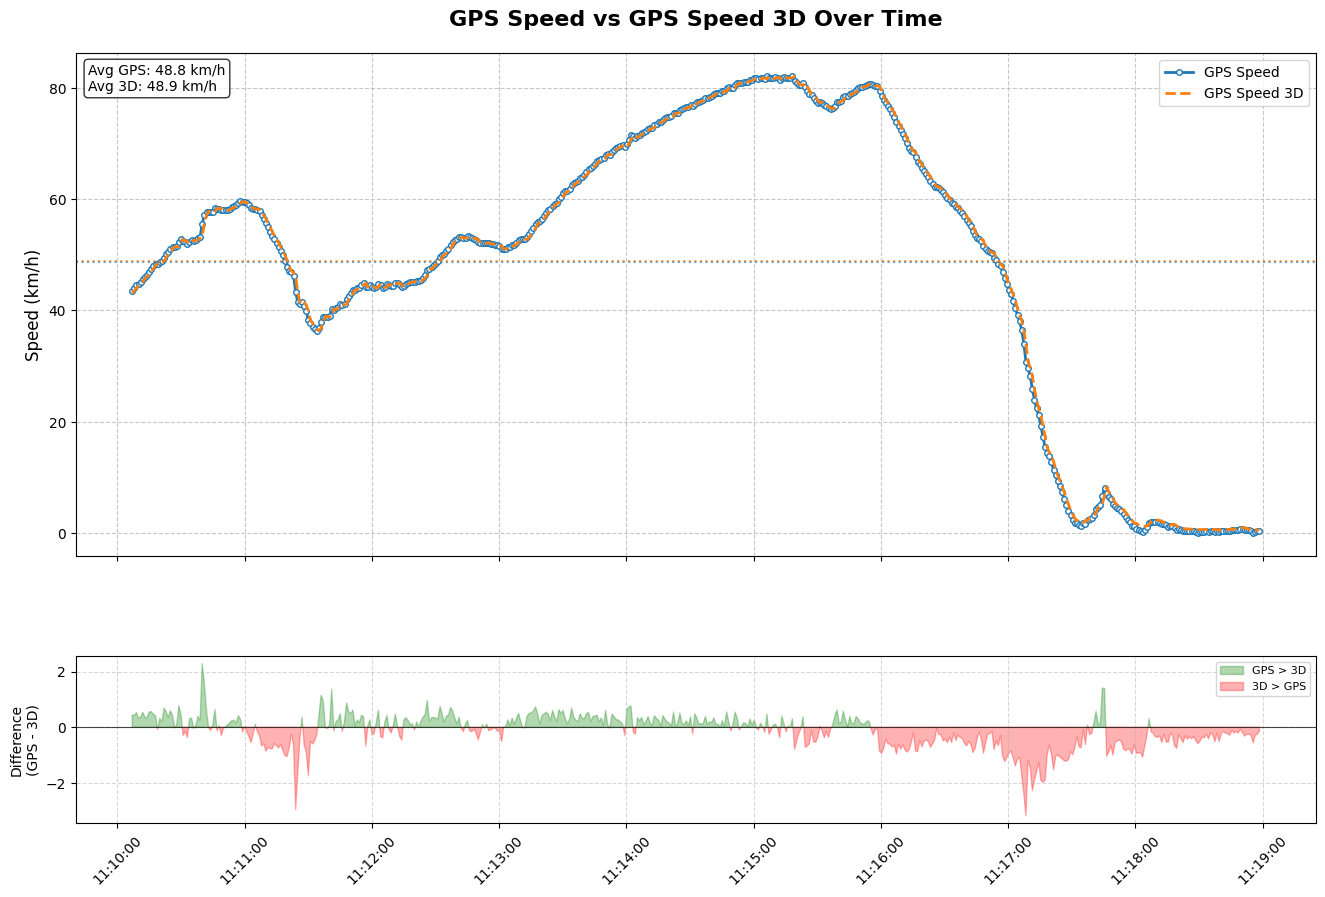


Speed Statistics:
GPS Speed: 0.0 - 82.1 km/h
3D Speed:  0.5 - 82.1 km/h
Average difference: 0.45 km/h


In [37]:
def extract_gps_data(filename):
    # First try reading as regular text, then try UTF-16-LE if that fails
    try:
        with open(filename, 'r', encoding='utf-8') as file:
            content = file.read()
    except UnicodeDecodeError:
        try:
            with open(filename, 'r', encoding='utf-16-le') as file:
                content = file.read()
        except UnicodeDecodeError:
            with open(filename, 'r', encoding='latin-1') as file:
                content = file.read()

    # Regular expressions to find GPS Speed, GPS Speed 3D, and GPS Date Time
    speed_pattern = r"GPS Speed\s+:\s+([\d.]+)"
    speed_3d_pattern = r"GPS Speed 3D\s+:\s+([\d.]+)"
    datetime_pattern = r"GPS Date Time\s+:\s+([\d:\.\s]+)"

    # Find all matches
    speeds = re.findall(speed_pattern, content)
    speeds_3d = re.findall(speed_3d_pattern, content)
    datetimes = re.findall(datetime_pattern, content)
    
    # Convert string speeds to float and clean up datetime strings
    speeds = [float(speed) for speed in speeds]
    speeds_3d = [float(speed) for speed in speeds_3d]
    datetimes = [dt.strip() for dt in datetimes]
    
    # Ensure we have matching lengths
    min_length = min(len(speeds), len(speeds_3d), len(datetimes))
    speeds = speeds[:min_length]
    speeds_3d = speeds_3d[:min_length]
    datetimes = datetimes[:min_length]
    
    return speeds, speeds_3d, datetimes

# Example usage:
if __name__ == "__main__":
    filename = "gopro-kart.txt"
    speeds, speeds_3d, datetimes = extract_gps_data(filename)
    
    if not speeds or not datetimes:
        print("No GPS data found. Please check the file format.")
    else:
        try:
            import pandas as pd
            import matplotlib.pyplot as plt
            import matplotlib.dates as mdates
            from matplotlib.ticker import MaxNLocator
            from matplotlib.gridspec import GridSpec
            
            # Create DataFrame
            df = pd.DataFrame({
                'datetime': pd.to_datetime(datetimes, format='%Y:%m:%d %H:%M:%S.%f', errors='coerce'),
                'speed_ms': speeds,
                'speed_3d_ms': speeds_3d
            }).dropna()
            
            # Convert to km/h
            df['speed_kmh'] = df['speed_ms'] * 3.6
            df['speed_3d_kmh'] = df['speed_3d_ms'] * 3.6
            
            # Create figure with subplots
            fig = plt.figure(figsize=(16, 10))
            gs = GridSpec(2, 1, height_ratios=[3, 1], hspace=0.3)
            
            # Main speed plot
            ax1 = fig.add_subplot(gs[0])
            
            # Plot both speeds
            line1, = ax1.plot(df['datetime'], df['speed_kmh'], 
                             color='#1f77b4', linewidth=2, 
                             marker='o', markersize=4, 
                             markerfacecolor='white', 
                             markeredgecolor='#1f77b4',
                             label='GPS Speed')
            
            line2, = ax1.plot(df['datetime'], df['speed_3d_kmh'],
                             color='#ff7f0e', linewidth=2,
                             linestyle='--',
                             label='GPS Speed 3D')
            
            # Add average lines
            avg_speed = df['speed_kmh'].mean()
            avg_speed_3d = df['speed_3d_kmh'].mean()
            
            ax1.axhline(y=avg_speed, color='#1f77b4', linestyle=':', alpha=0.7)
            ax1.axhline(y=avg_speed_3d, color='#ff7f0e', linestyle=':', alpha=0.7)
            
            # Add difference plot
            ax2 = fig.add_subplot(gs[1], sharex=ax1)
            diff = df['speed_kmh'] - df['speed_3d_kmh']
            ax2.fill_between(df['datetime'], 0, diff, 
                            where=(diff >= 0), 
                            color='green', alpha=0.3, 
                            interpolate=True, label='GPS > 3D')
            ax2.fill_between(df['datetime'], 0, diff, 
                            where=(diff < 0), 
                            color='red', alpha=0.3, 
                            interpolate=True, label='3D > GPS')
            ax2.axhline(y=0, color='black', linewidth=0.8, alpha=0.7)
            
            # Format main plot
            ax1.set_title('GPS Speed vs GPS Speed 3D Over Time', fontsize=16, pad=20, fontweight='bold')
            ax1.set_ylabel('Speed (km/h)', fontsize=12)
            ax1.grid(True, linestyle='--', alpha=0.7)
            ax1.legend(loc='upper right')
            
            # Format difference plot
            ax2.set_ylabel('Difference\n(GPS - 3D)', fontsize=10)
            ax2.grid(True, linestyle='--', alpha=0.5)
            ax2.legend(loc='upper right', fontsize=8)
            
            # Format x-axis
            date_format = '%H:%M:%S'
            ax2.xaxis.set_major_formatter(mdates.DateFormatter(date_format))
            plt.setp(ax1.get_xticklabels(), visible=False)  # Hide x-axis labels on top plot
            plt.xticks(rotation=45)
            
            # Add text annotations
            ax1.text(0.01, 0.98, 
                    f"Avg GPS: {avg_speed:.1f} km/h\nAvg 3D: {avg_speed_3d:.1f} km/h",
                    transform=ax1.transAxes,
                    verticalalignment='top',
                    bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
            
            # Adjust layout
            plt.tight_layout()
            plt.show()
            
            # Print some statistics
            print("\nSpeed Statistics:")
            print(f"GPS Speed: {df['speed_kmh'].min():.1f} - {df['speed_kmh'].max():.1f} km/h")
            print(f"3D Speed:  {df['speed_3d_kmh'].min():.1f} - {df['speed_3d_kmh'].max():.1f} km/h")
            print(f"Average difference: {diff.abs().mean():.2f} km/h")
            
        except ImportError:
            print("\nRequired packages not found. Please install pandas and matplotlib.")

In [41]:
def combine_files(input_files, output_file):
    """
    Combine multiple text files into a single output file.
    
    Args:
        input_files: List of input file paths
        output_file: Path for the combined output file
    """
    try:
        with open(output_file, 'w', encoding='utf-8') as outfile:
            for i, file_path in enumerate(input_files, 1):
                try:
                    # Try different encodings
                    for encoding in ['utf-8', 'utf-16-le', 'latin-1']:
                        try:
                            with open(file_path, 'r', encoding=encoding) as infile:
                                content = infile.read()
                                # Add a separator between files
                                if i > 1:
                                    outfile.write('\n\n' + '='*80 + '\n')
                                    outfile.write(f'FILE: {file_path}\n')
                                    outfile.write('='*80 + '\n\n')
                                outfile.write(content)
                            print(f"Successfully read {file_path} with {encoding} encoding")
                            break
                        except UnicodeDecodeError:
                            continue
                        except Exception as e:
                            print(f"Error reading {file_path} with {encoding}: {str(e)}")
                            continue
                except Exception as e:
                    print(f"Error processing {file_path}: {str(e)}")
                    continue
        
        print(f"\nSuccessfully combined {len(input_files)} files into {output_file}")
        return True
        
    except Exception as e:
        print(f"Error writing to {output_file}: {str(e)}")
        return False

# Files to combine
input_files = [
    'output-kart25dec-1a.txt',
    'output-kart25dec-1b.txt',
    'output-kart25dec-1c.txt'
]

# Output file
output_file = 'output-kart25dec-1all.txt'

# Combine the files
combine_files(input_files, output_file)

Successfully read output-kart25dec-1a.txt with utf-16-le encoding
Successfully read output-kart25dec-1b.txt with utf-16-le encoding
Successfully read output-kart25dec-1c.txt with utf-16-le encoding

Successfully combined 3 files into output-kart25dec-1all.txt


True

Successfully parsed 1520 GPS data points

First few rows:
                 datetime  speed_ms  speed_kmh  speed_3d_ms  speed_3d_kmh  \
0 2025-12-20 11:01:14.370       0.0        0.0          0.0           0.0   
1 2025-12-20 11:01:16.515       0.0        0.0          0.0           0.0   
2 2025-12-20 11:01:17.560       0.0        0.0          0.0           0.0   
3 2025-12-20 11:01:18.550       0.0        0.0          0.0           0.0   
4 2025-12-20 11:01:19.540       0.0        0.0          0.0           0.0   

   altitude                source_file  
0   1406.77  output-kart25dec-1all.txt  
1   1406.77  output-kart25dec-1all.txt  
2   1406.77  output-kart25dec-1all.txt  
3   1406.77  output-kart25dec-1all.txt  
4   1406.77  output-kart25dec-1all.txt  

Data saved to gps_data_export.csv

Statistics:
Time range: 2025-12-20 11:01:14.370000 to 2025-12-20 11:26:35.944000
Max speed: 298.4 km/h
Avg speed: 137.8 km/h


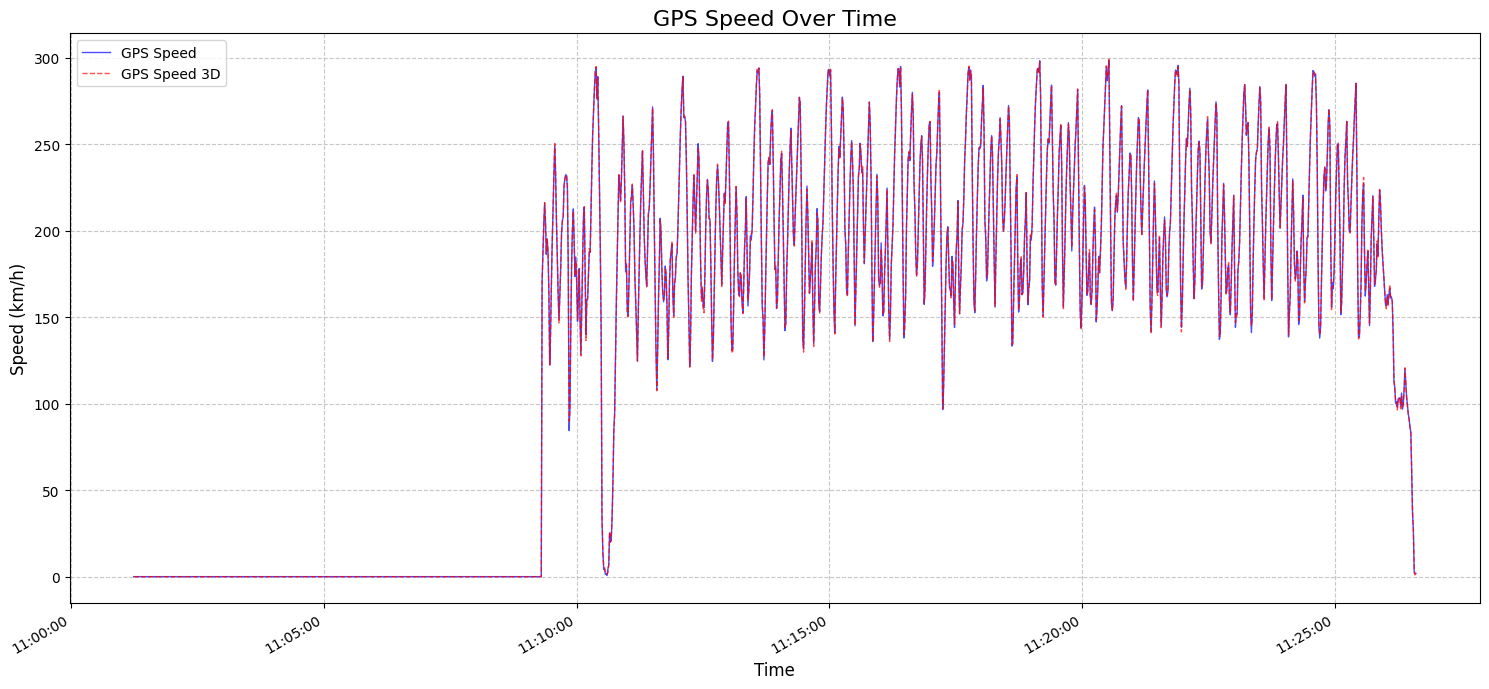

In [42]:
def parse_gps_data(file_paths):
    """
    Parse GPS data from multiple files and combine into a single DataFrame.
    
    Args:
        file_paths: List of file paths to process
        
    Returns:
        pandas.DataFrame with combined GPS data
    """
    import pandas as pd
    from datetime import datetime
    import re
    
    all_data = []
    
    for file_path in file_paths:
        try:
            # Read file with appropriate encoding
            with open(file_path, 'r', encoding='utf-8') as file:
                content = file.read()
            
            # Split content into blocks of GPS data
            gps_blocks = re.split(r'(?=GPS Date Time\s+:)', content)
            
            for block in gps_blocks:
                if not block.strip() or 'GPS Date Time' not in block:
                    continue
                    
                # Initialize data dictionary for this block
                data = {'source_file': file_path.split('/')[-1]}
                
                # Extract all key-value pairs
                for line in block.split('\n'):
                    if ':' in line:
                        key, value = line.split(':', 1)
                        key = key.strip()
                        value = value.strip()
                        
                        # Handle different GPS fields
                        if key == 'GPS Date Time':
                            try:
                                data['datetime'] = datetime.strptime(value, '%Y:%m:%d %H:%M:%S.%f')
                            except ValueError:
                                continue
                        elif key == 'GPS Speed':
                            try:
                                data['speed_ms'] = float(value)
                                data['speed_kmh'] = float(value) * 3.6
                            except (ValueError, TypeError):
                                pass
                        elif key == 'GPS Speed 3D':
                            try:
                                data['speed_3d_ms'] = float(value)
                                data['speed_3d_kmh'] = float(value) * 3.6
                            except (ValueError, TypeError):
                                pass
                        elif key == 'GPS Altitude':
                            try:
                                data['altitude'] = float(value.split()[0])  # Get the number before the unit
                            except (ValueError, IndexError):
                                pass
                
                # Add to our data if we have a valid datetime and speed
                if 'datetime' in data and 'speed_ms' in data:
                    all_data.append(data)
                    
        except Exception as e:
            print(f"Error processing {file_path}: {str(e)}")
            continue
    
    # Create DataFrame if we have data
    if all_data:
        df = pd.DataFrame(all_data)
        
        # Ensure consistent column order
        columns = ['datetime', 'speed_ms', 'speed_kmh', 'speed_3d_ms', 
                  'speed_3d_kmh', 'altitude', 'source_file']
        df = df[[col for col in columns if col in df.columns]]
        
        # Sort by datetime
        df = df.sort_values('datetime').reset_index(drop=True)
        return df
    else:
        return pd.DataFrame()

# Example usage
if __name__ == "__main__":
    # List of files to process
    file_paths = [
        'output-kart25dec-1all.txt'  # Replace with your actual file paths
    ]
    
    # Parse the data
    gps_data = parse_gps_data(file_paths)
    
    if not gps_data.empty:
        print(f"Successfully parsed {len(gps_data)} GPS data points")
        print("\nFirst few rows:")
        print(gps_data.head())
        
        # Save to CSV
        output_file = 'gps_data_export.csv'
        gps_data.to_csv(output_file, index=False)
        print(f"\nData saved to {output_file}")
        
        # Basic statistics
        print("\nStatistics:")
        print(f"Time range: {gps_data['datetime'].min()} to {gps_data['datetime'].max()}")
        print(f"Max speed: {gps_data['speed_kmh'].max():.1f} km/h")
        print(f"Avg speed: {gps_data['speed_kmh'].mean():.1f} km/h")
        
        # Plot the data
        import matplotlib.pyplot as plt
        import matplotlib.dates as mdates
        
        plt.figure(figsize=(15, 7))
        plt.plot(gps_data['datetime'], gps_data['speed_kmh'], 
                'b-', linewidth=1, alpha=0.7, label='GPS Speed')
        
        if 'speed_3d_kmh' in gps_data:
            plt.plot(gps_data['datetime'], gps_data['speed_3d_kmh'],
                    'r--', linewidth=1, alpha=0.7, label='GPS Speed 3D')
        
        plt.title('GPS Speed Over Time', fontsize=16)
        plt.xlabel('Time', fontsize=12)
        plt.ylabel('Speed (km/h)', fontsize=12)
        plt.grid(True, linestyle='--', alpha=0.7)
        
        # Format x-axis
        plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
        plt.gcf().autofmt_xdate()
        
        plt.legend()
        plt.tight_layout()
        plt.show()
        
    else:
        print("No valid GPS data found in the specified files.")

In [43]:
def get_top_speeds(gps_data, n=10):
    """
    Extract and display the top N maximum speeds with their timestamps.
    
    Args:
        gps_data: Path to the GPS data file
        n: Number of top speeds to return (default: 10)
    """
    import pandas as pd
    from datetime import datetime
    import re
    
    data = []
    
    # Read the file with appropriate encoding
    for encoding in ['utf-8', 'utf-16-le', 'latin-1']:
        try:
            with open(gps_data, 'r', encoding=encoding) as f:
                content = f.read()
            break
        except UnicodeDecodeError:
            continue
    
    # Extract GPS data points with timestamps and speeds
    pattern = r'GPS Date Time\s+:\s+([\d:\.\s]+).*?GPS Speed\s+:\s+([\d.]+)'
    matches = re.findall(pattern, content, re.DOTALL)
    
    for timestamp, speed in matches:
        try:
            dt = datetime.strptime(timestamp.strip(), '%Y:%m:%d %H:%M:%S.%f')
            data.append({
                'datetime': dt,
                'speed_ms': float(speed),
                'speed_kmh': float(speed) * 3.6
            })
        except ValueError:
            continue
    
    if not data:
        print("No valid GPS speed data found.")
        return
    
    # Create DataFrame and sort by speed
    df = pd.DataFrame(data).sort_values('speed_kmh', ascending=False).head(n)
    
    # Format the output
    print(f"\nTop {len(df)} Maximum Speeds:")
    print("=" * 80)
    print(f"{'Rank':<5} {'Date/Time':<25} {'Speed (km/h)':>12} {'Speed (m/s)':>12}")
    print("-" * 60)
    
    for i, (_, row) in enumerate(df.iterrows(), 1):
        print(f"{i:<5} {row['datetime']} {row['speed_kmh']:>12.2f} {row['speed_ms']:>12.2f}")
    
    return df

# Example usage
if __name__ == "__main__":
    gps_file = "output-kart25dec-1all.txt"  # Update with your file path
    top_speeds = get_top_speeds(gps_file)


Top 10 Maximum Speeds:
Rank  Date/Time                 Speed (km/h)  Speed (m/s)
------------------------------------------------------------
1     2025-12-20 11:19:10.555000       298.56        82.93
2     2025-12-20 11:20:32.615000       297.59        82.66
3     2025-12-20 11:21:54.675000       296.42        82.34
4     2025-12-20 11:16:25.390000       295.41        82.06
5     2025-12-20 11:16:22.365000       294.80        81.89
6     2025-12-20 11:19:08.520000       294.71        81.86
7     2025-12-20 11:19:09.510000       294.52        81.81
8     2025-12-20 11:10:24.040000       294.48        81.80
9     2025-12-20 11:16:23.355000       293.74        81.59
10    2025-12-20 11:15:02.285000       293.71        81.59


In [44]:
def analyze_speeds(gps_file, top_n=10):
    """
    Analyze GPS speeds and calculate time differences between top speed events.
    
    Args:
        gps_file: Path to the GPS data file
        top_n: Number of top speeds to analyze (default: 10)
    """
    import pandas as pd
    from datetime import datetime, timedelta
    import re
    
    # Read and parse the file
    for encoding in ['utf-8', 'utf-16-le', 'latin-1']:
        try:
            with open(gps_file, 'r', encoding=encoding) as f:
                content = f.read()
            break
        except UnicodeDecodeError:
            continue
    else:
        print("Error: Could not read the file with any encoding")
        return

    # Extract GPS data
    data = []
    pattern = r'GPS Date Time\s+:\s+([\d:\.\s]+).*?GPS Speed\s+:\s+([\d.]+)'
    matches = re.findall(pattern, content, re.DOTALL)
    
    for timestamp, speed in matches:
        try:
            dt = datetime.strptime(timestamp.strip(), '%Y:%m:%d %H:%M:%S.%f')
            data.append({
                'datetime': dt,
                'speed_ms': float(speed),
                'speed_kmh': float(speed) * 3.6
            })
        except ValueError:
            continue
    
    if not data:
        print("No valid GPS speed data found.")
        return
    
    # Create DataFrame and get top speeds
    df = pd.DataFrame(data)
    top_speeds = df.sort_values('speed_kmh', ascending=False).head(top_n).copy()
    
    # Sort by time to get proper sequence
    top_speeds = top_speeds.sort_values('datetime')
    
    # Calculate time differences
    top_speeds['time_since_previous'] = top_speeds['datetime'].diff().dt.total_seconds()
    top_speeds['time_to_next'] = top_speeds['datetime'].diff(-1).dt.total_seconds().abs()
    
    # Format the output
    print(f"\nTop {len(top_speeds)} Maximum Speeds with Time Differences:")
    print("=" * 100)
    print(f"{'Rank':<5} {'Date/Time':<25} {'Speed (km/h)':>12} {'Since Prev (s)':>15} {'To Next (s)':>15} {'Speed Diff (km/h)':>18}")
    print("-" * 100)
    
    # Calculate speed differences
    top_speeds['speed_diff'] = top_speeds['speed_kmh'].diff().abs()
    
    for i, (_, row) in enumerate(top_speeds.iterrows(), 1):
        time_since = f"{row['time_since_previous']:.1f}" if not pd.isna(row['time_since_previous']) else "N/A"
        time_to = f"{row['time_to_next']:.1f}" if not pd.isna(row['time_to_next']) else "N/A"
        speed_diff = f"{row['speed_diff']:.2f}" if not pd.isna(row['speed_diff']) else "N/A"
        
        print(f"{i:<5} {row['datetime']} {row['speed_kmh']:>12.2f} {time_since:>15} {time_to:>15} {speed_diff:>18}")
    
    # Calculate and display statistics
    avg_interval = top_speeds['time_since_previous'].mean()
    min_interval = top_speeds['time_since_previous'].min()
    max_interval = top_speeds['time_since_previous'].max()
    
    print("\nTime Interval Statistics Between Top Speeds:")
    print("-" * 50)
    print(f"Average interval: {avg_interval:.1f} seconds")
    print(f"Minimum interval: {min_interval:.1f} seconds")
    print(f"Maximum interval: {max_interval:.1f} seconds")
    
    return top_speeds

# Example usage
if __name__ == "__main__":
    gps_file = "output-kart25dec-1all.txt"  # Update with your file path
    top_speeds = analyze_speeds(gps_file)
    
    # Save to CSV if needed
    if top_speeds is not None:
        output_file = 'top_speeds_analysis.csv'
        top_speeds.to_csv(output_file, index=False)
        print(f"\nAnalysis saved to {output_file}")


Top 10 Maximum Speeds with Time Differences:
Rank  Date/Time                 Speed (km/h)  Since Prev (s)     To Next (s)  Speed Diff (km/h)
----------------------------------------------------------------------------------------------------
1     2025-12-20 11:10:24.040000       294.48             N/A           278.2                N/A
2     2025-12-20 11:15:02.285000       293.71           278.2            80.1               0.76
3     2025-12-20 11:16:22.365000       294.80            80.1             1.0               1.09
4     2025-12-20 11:16:23.355000       293.74             1.0             2.0               1.06
5     2025-12-20 11:16:25.390000       295.41             2.0           163.1               1.67
6     2025-12-20 11:19:08.520000       294.71           163.1             1.0               0.70
7     2025-12-20 11:19:09.510000       294.52             1.0             1.0               0.19
8     2025-12-20 11:19:10.555000       298.56             1.0            82.1 

In [45]:
def get_top_speeds_with_window(gps_file, top_n=10, min_time_diff_seconds=5):
    """
    Find top speeds with a minimum time difference between them.
    
    Args:
        gps_file: Path to the GPS data file
        top_n: Number of top speeds to find
        min_time_diff_seconds: Minimum time difference required between top speeds (in seconds)
    """
    import pandas as pd
    from datetime import datetime, timedelta
    import re
    
    # Read and parse the file
    for encoding in ['utf-8', 'utf-16-le', 'latin-1']:
        try:
            with open(gps_file, 'r', encoding=encoding) as f:
                content = f.read()
            break
        except UnicodeDecodeError:
            continue
    else:
        print("Error: Could not read the file with any encoding")
        return

    # Extract GPS data - assuming speed is already in km/h
    data = []
    pattern = r'GPS Date Time\s+:\s+([\d:\.\s]+).*?GPS Speed\s+:\s+([\d.]+)'
    matches = re.findall(pattern, content, re.DOTALL)
    
    for timestamp, speed in matches:
        try:
            dt = datetime.strptime(timestamp.strip(), '%Y:%m:%d %H:%M:%S.%f')
            data.append({
                'datetime': dt,
                'speed_kmh': float(speed),
                'speed_ms': float(speed) / 3.6  # Convert km/h to m/s
            })
        except ValueError:
            continue
    
    if not data:
        print("No valid GPS speed data found.")
        return
    
    # Create DataFrame and sort by speed (descending)
    df = pd.DataFrame(data).sort_values('speed_kmh', ascending=False)
    
    # Select top speeds with minimum time difference
    selected_speeds = []
    remaining_speeds = df.copy()
    
    while len(selected_speeds) < top_n and not remaining_speeds.empty:
        # Get the fastest remaining speed
        top_speed = remaining_speeds.iloc[0].copy()
        selected_speeds.append(top_speed)
        
        # Remove speeds that are too close in time
        time_diff = (remaining_speeds['datetime'] - top_speed['datetime']).abs()
        remaining_speeds = remaining_speeds[time_diff.dt.total_seconds() >= min_time_diff_seconds]
        
        # Break if no more speeds left
        if remaining_speeds.empty:
            break
    
    # Create result DataFrame
    result = pd.DataFrame(selected_speeds[:top_n])
    result = result.sort_values('datetime')
    
    # Calculate time differences
    result['time_since_previous'] = result['datetime'].diff().dt.total_seconds()
    result['time_to_next'] = result['datetime'].diff(-1).dt.total_seconds().abs()
    
    # Format the output
    print(f"\nTop {len(result)} Maximum Speeds (minimum {min_time_diff_seconds}s apart):")
    print("=" * 100)
    print(f"{'Rank':<5} {'Date/Time':<25} {'Speed (km/h)':>12} {'Speed (m/s)':>12} {'Since Prev (s)':>15} {'To Next (s)':>15}")
    print("-" * 100)
    
    for i, (_, row) in enumerate(result.iterrows(), 1):
        time_since = f"{row['time_since_previous']:.1f}" if not pd.isna(row['time_since_previous']) else "N/A"
        time_to = f"{row['time_to_next']:.1f}" if not pd.isna(row['time_to_next']) else "N/A"
        
        print(f"{i:<5} {row['datetime']} {row['speed_kmh']:>12.2f} {row['speed_ms']:>12.2f} {time_since:>15} {time_to:>15}")
    
    return result

# Example usage
if __name__ == "__main__":
    gps_file = "output-kart25dec-1all.txt"  # Update with your file path
    
    # Get top speeds that are at least 10 seconds apart
    top_speeds = get_top_speeds_with_window(
        gps_file,
        top_n=10,
        min_time_diff_seconds=10  # Minimum 10 seconds between top speeds
    )
    
    # Save to CSV if needed
    if top_speeds is not None:
        output_file = 'top_speeds_with_window.csv'
        top_speeds.to_csv(output_file, index=False)
        print(f"\nResults saved to {output_file}")


Top 10 Maximum Speeds (minimum 10s apart):
Rank  Date/Time                 Speed (km/h)  Speed (m/s)  Since Prev (s)     To Next (s)
----------------------------------------------------------------------------------------------------
1     2025-12-20 11:10:24.040000        81.80        22.72             N/A           103.1
2     2025-12-20 11:12:07.165000        80.60        22.39           103.1            90.0
3     2025-12-20 11:13:37.200000        81.39        22.61            90.0            85.1
4     2025-12-20 11:15:02.285000        81.59        22.66            85.1            83.1
5     2025-12-20 11:16:25.390000        82.06        22.79            83.1            83.0
6     2025-12-20 11:17:48.440000        81.57        22.66            83.0            82.1
7     2025-12-20 11:19:10.555000        82.93        23.04            82.1            82.1
8     2025-12-20 11:20:32.615000        82.66        22.96            82.1            82.1
9     2025-12-20 11:21:54.675000     

In [49]:
def get_min_time_diff(top_speeds):
    """
    Calculate the minimum time difference between consecutive top speeds.
    
    Args:
        top_speeds: DataFrame from get_top_speeds_with_window()
    """
    if 'time_since_previous' in top_speeds.columns:
        min_diff = top_speeds['time_since_previous'].min()
        if not pd.isna(min_diff):
            minutes = int(min_diff // 60)
            seconds = int(min_diff % 60)
            print(f"\nMinimum time between top speeds: {minutes}:{seconds:02d} (mm:ss)")
            return min_diff
    return None

# Example usage:
# top_speeds = get_top_speeds_with_window("your_file.txt")
min_diff = get_min_time_diff(top_speeds)


Minimum time between top speeds: 1:22 (mm:ss)


In [51]:
def extract_gopro_speeds(gps_file):
    """
    Extract GPS speed data from GoPro video metadata file.
    
    Args:
        gps_file: Path to the GoPro metadata file (e.g., 'output-kart25dec-1b.txt')
        
    Returns:
        DataFrame with 'datetime' and 'speed_kmh' columns
    """
    import pandas as pd
    from datetime import datetime, timedelta
    import re
    
    # Read the file with appropriate encoding
    for encoding in ['utf-8', 'utf-16-le', 'latin-1']:
        try:
            with open(gps_file, 'r', encoding=encoding) as f:
                content = f.read()
            break
        except UnicodeDecodeError:
            continue
    else:
        print("Error: Could not read the file with any encoding")
        return None

    # Extract GPS data
    data = []
    pattern = r'GPS Date Time\s+:\s+([\d:\.\s]+).*?GPS Speed\s+:\s+([\d.]+)'
    matches = re.findall(pattern, content, re.DOTALL)
    
    for timestamp, speed in matches:
        try:
            dt = datetime.strptime(timestamp.strip(), '%Y:%m:%d %H:%M:%S.%f')
            data.append({
                'datetime': dt,
                'speed_kmh': float(speed)
            })
        except ValueError:
            continue
    
    if not data:
        print("No valid GPS speed data found.")
        return None
    
    # Create DataFrame and sort by datetime
    df = pd.DataFrame(data).sort_values('datetime').reset_index(drop=True)
    return df

# Example usage:
# speed_data = extract_gopro_speeds('output-kart25dec-1b.txt')
# create_speed_overlay("GX020410.MP4", speed_data, "output_with_speed.mp4")

In [2]:
def create_speed_overlay(input_video, speed_data, output_video, font_size=48, font_color='white'):
    """
    Create a video with speed overlay using FFmpeg.
    
    Args:
        input_video: Path to the input video file (e.g., 'input.mp4')
        speed_data: DataFrame with 'datetime' and 'speed_kmh' columns
        output_video: Path for the output video (e.g., 'output_with_speed.mp4')
        font_size: Text size (default: 48)
        font_color: Text color (default: 'white')
    """
    import subprocess
    import tempfile
    import os
    from datetime import datetime

    # Create a temporary file for the speed data
    with tempfile.NamedTemporaryFile(mode='w', suffix='.txt', delete=False) as f:
        # Write speed data in format: timestamp_in_seconds\tspeed_text
        for _, row in speed_data.iterrows():
            # Calculate seconds since first timestamp
            timestamp = (row['datetime'] - speed_data['datetime'].min()).total_seconds()
            speed_text = f"{row['speed_kmh']:.1f} km/h"
            f.write(f"{timestamp:.3f}\t{speed_text}\n")
        data_file = f.name

    try:
        # FFmpeg command
        cmd = [
            'ffmpeg',
            '-i', input_video,  # Input video
            '-vf', (
                f"drawtext=textfile={data_file}:"
                f"x=(w-text_w-20):y=20:"  # Position at top-right
                f"fontsize={font_size}:"
                f"fontcolor={font_color}:"
                "box=1:boxcolor=black@0.5:boxborderw=5:"  # Semi-transparent background
                "reload=1"  # Reload the file for each frame
            ),
            '-c:a', 'copy',  # Copy audio without re-encoding
            '-y',  # Overwrite output file if it exists
            output_video
        ]

        # Run FFmpeg
        print("Creating video with speed overlay (this may take a while)...")
        subprocess.run(cmd, check=True)
        print(f"Video with speed overlay created: {output_video}")

    except subprocess.CalledProcessError as e:
        print(f"Error creating video: {e}")
    finally:
        # Clean up temporary file
        if os.path.exists(data_file):
            os.remove(data_file)

# Example usage:
create_speed_overlay("GX020410.MP4", speed_data, "GX020410_with_speed.mp4")

Creating video with speed overlay (this may take a while)...


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

KeyboardInterrupt: 

In [ ]:
def extract_gopro_speeds(gps_file):
    """
    Extract GPS speed data from GoPro video metadata file.
    
    Args:
        gps_file: Path to the GoPro metadata file (e.g., 'output-kart25dec-1b.txt')
        
    Returns:
        DataFrame with 'datetime' and 'speed_kmh' columns
    """
    import pandas as pd
    from datetime import datetime, timedelta
    import re
    
    # Read the file with appropriate encoding
    for encoding in ['utf-8', 'utf-16-le', 'latin-1']:
        try:
            with open(gps_file, 'r', encoding=encoding) as f:
                content = f.read()
            break
        except UnicodeDecodeError:
            continue
    else:
        print("Error: Could not read the file with any encoding")
        return None

    # Extract GPS data
    data = []
    pattern = r'GPS Date Time\s+:\s+([\d:\.\s]+).*?GPS Speed\s+:\s+([\d.]+)'
    matches = re.findall(pattern, content, re.DOTALL)
    
    for timestamp, speed in matches:
        try:
            dt = datetime.strptime(timestamp.strip(), '%Y:%m:%d %H:%M:%S.%f')
            data.append({
                'datetime': dt,
                'speed_kmh': float(speed)
            })
        except ValueError:
            continue
    
    if not data:
        print("No valid GPS speed data found.")
        return None
    
    # Create DataFrame and sort by datetime
    df = pd.DataFrame(data).sort_values('datetime').reset_index(drop=True)
    return df

# Example usage:
speed_data = extract_gopro_speeds('output-kart25dec-1b.txt')
create_speed_overlay("GX020410.MP4", speed_data, "GX020410_with_speed.mp4")

Creating video with speed overlay (this may take a while)...


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab